# Process Study Results


In [1]:
import pandas as pd
import os
import json

import matplotlib.pyplot as plt

In [2]:
verbose = True

NUMBER_OF_CASES = 4

---

# Parsing


## Load study results into dataframes


Load `.json` files into python dictionnaries


In [3]:
# Define the path to the folder containing JSON files
folder_path = "results"

# Initialize a list to store the dictionaries
json_dicts = []

# Iterate over all files in the specified folder
for filename in os.listdir(folder_path):
    if filename.endswith(".json"):
        file_path = os.path.join(folder_path, filename)
        with open(file_path, "r") as json_file:
            data = json.load(json_file)
            json_dicts.append(data)

In [4]:
if verbose:
    # Print the list of dictionaries
    for i, json_dict in enumerate(json_dicts):
        print(f"Dictionary {i+1}: {json_dict}")

Dictionary 1: {'group': 'Group.RECOMMENDATIONS_DRIVEN', 'model': 'gpt-4o-2024-08-06', 'background': 'Resident', 'domain_experience': '0-1 year', 'llm_usage': 'I have tried such tools before, but do not use them regularly', 'ai_study': 'No', 'ai_trust_before_0': 4, 'ai_trust_before_1': 2, 'ai_trust_before_2': 2, 'ai_trust_before_3': 2, 'ai_trust_before_4': 4, 'ai_trust_before_5': 2, 'ai_trust_before_6': 3, 'ai_trust_before_7': 4, 'case_0_start_time': '10:46:18.795849', 'case_0_hypotheses': {'edited_rows': {}, 'added_rows': [{'hypothesis': 'Non infective exacerbation of COPD secondary to PE post surgery'}, {'hypothesis': 'Infective exarcebation of COPD'}, {'hypothesis': 'Heart failure'}, {'hypothesis': 'Myocardial infarct'}], 'deleted_rows': []}, 'case_0_ai_help_chatcmpl-A8zeRG81sh5Qdy7f1fJqx918Yn0Uv': {'hypotheses': ['Non infective exacerbation of COPD secondary to PE post surgery'], 'selected_hypotheses': ['Non infective exacerbation of COPD secondary to PE post surgery'], 'raw_message

Create a pandas `DataFrame` with those dictionnaries


In [5]:
df = pd.DataFrame(json_dicts)

In [6]:
if verbose:
    df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 77 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   group                                                  2 non-null      object
 1   model                                                  2 non-null      object
 2   background                                             2 non-null      object
 3   domain_experience                                      2 non-null      object
 4   llm_usage                                              2 non-null      object
 5   ai_study                                               2 non-null      object
 6   ai_trust_before_0                                      2 non-null      int64 
 7   ai_trust_before_1                                      2 non-null      int64 
 8   ai_trust_before_2                                      2 non-nul

In [7]:
if verbose:
    display(df.head())

,group,model,background,domain_experience,llm_usage,ai_study,ai_trust_before_0,ai_trust_before_1,ai_trust_before_2,ai_trust_before_3,...,case_0_ai_help_chatcmpl-A7bt87uptbdSKy1eWizVTTCER0b7h,case_1_ai_help_chatcmpl-A7byxquofDxXhtzmUjiGz8RZbCv65,case_1_ai_help_chatcmpl-A7bzfNn3ILFdsfBeu1K4OigKwFX2G,case_1_ai_help_chatcmpl-A7c0VlSxTbI3gPaa9fQHQ4tqDatnP,case_1_ai_help_chatcmpl-A7c1762HrFrnDlMA0dpiYKpaPZ76d,case_2_ai_help_chatcmpl-A7c8R60gP9xpFCgAgAMtLhSmjEngy,case_2_ai_help_chatcmpl-A7cAFvVPLtsxAZ1ls1DKb3X3nWfhM,case_3_ai_help_chatcmpl-A7cG3s3lf42MRQWkeDsln6qvPbcj0,case_3_ai_help_chatcmpl-A7cH6xb3n13GFswyj2C5QuCxYZM5J,case_3_ai_help_chatcmpl-A7cHXHiwOcdicZoBlIXuuj7owV6Wa
0,Group.RECOMMENDATIONS_DRIVEN,gpt-4o-2024-08-06,Resident,0-1 year,"I have tried such tools before, but do not use...",No,4,2,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Group.HYPOTHESIS_DRIVEN,gpt-4o-2024-08-06,Resident,2-4 years,I use such tools monthly,No,3,3,2,2,...,{'hypotheses': ['infective exacerbation of COP...,"{'hypotheses': ['hypertensive crisis'], 'selec...","{'hypotheses': ['hypertensive crisis', 'uremia...","{'hypotheses': ['hypertensive crisis', 'uremia...","{'hypotheses': ['hypertensive crisis', 'uremia...","{'hypotheses': ['temporal arteritis'], 'select...","{'hypotheses': ['temporal arteritis', 'maligna...","{'hypotheses': ['pulmonary embolism'], 'select...","{'hypotheses': ['pulmonary embolism', 'pneumon...","{'hypotheses': ['pulmonary embolism', 'pneumon..."


## Add R-DEA scores


In [8]:
# Load the R-DEA scores located in the 'results' directory
r_dea = pd.read_csv("results/r_dea.csv")

# Append the columns of the new data to the existing DataFrame
# Ensure that both DataFrames have the same number of rows
if len(df) == len(r_dea):
    df = pd.concat([df, r_dea], axis=1)
else:
    raise ValueError("The number of rows in df and in R-DEA do not match.")

In [9]:
if verbose:
    display(r_dea.head())
    display(df.head())

,case_0_D,case_0_E,case_0_A,case_0_R-DEA,case_1_D,case_1_E,case_1_A,case_1_R-DEA,case_2_D,case_2_E,case_2_A,case_2_R-DEA,case_3_D,case_3_E,case_3_A,case_3_R-DEA
0,2,1,0,2,2,1,1,2,1,2,2,6,2,1,0,3
1,2,1,0,2,2,1,1,2,1,2,2,6,2,1,0,3


,group,model,background,domain_experience,llm_usage,ai_study,ai_trust_before_0,ai_trust_before_1,ai_trust_before_2,ai_trust_before_3,...,case_1_A,case_1_R-DEA,case_2_D,case_2_E,case_2_A,case_2_R-DEA,case_3_D,case_3_E,case_3_A,case_3_R-DEA
0,Group.RECOMMENDATIONS_DRIVEN,gpt-4o-2024-08-06,Resident,0-1 year,"I have tried such tools before, but do not use...",No,4,2,2,2,...,1,2,1,2,2,6,2,1,0,3
1,Group.HYPOTHESIS_DRIVEN,gpt-4o-2024-08-06,Resident,2-4 years,I use such tools monthly,No,3,3,2,2,...,1,2,1,2,2,6,2,1,0,3


## Calculate some statistics


Get the mean of the trust questions before and after, and calculate the difference.


In [10]:
ai_trust_before_columns = [col for col in df.columns if "ai_trust_before" in col]
ai_trust_after_columns = [col for col in df.columns if "ai_trust_after" in col]

# Invert results of question 6
df["ai_trust_before_5"] = 6 - df["ai_trust_before_5"]
df["ai_trust_after_5"] = 6 - df["ai_trust_after_5"]

# Calculate the mean of the trust questions
df["ai_trust_before"] = df[ai_trust_before_columns].mean(axis=1)
df["ai_trust_after"] = df[ai_trust_after_columns].mean(axis=1)

# Calculate the difference in trust before and after
df["ai_trust_diff"] = df["ai_trust_after"] - df["ai_trust_before"]

In [11]:
if verbose:
    display(df[["ai_trust_before", "ai_trust_after", "ai_trust_diff"]].head())

,ai_trust_before,ai_trust_after,ai_trust_diff
0,3.125,3.500,0.375
1,3.000,3.625,0.625


Calculate the time it took to solve each case and and the mean duration


In [12]:
# Convert times to number of seconds

# For each case, calculate the time it took to solve it
for i in range(NUMBER_OF_CASES):
    df[f"case_{i}_time"] = (
        pd.to_datetime(df[f"case_{i}_end_time"]) - pd.to_datetime(
        df[f"case_{i}_start_time"])
    ).dt.total_seconds().round()

# Calculate the mean time to solve a case
df["mean_time"] = df[[f"case_{i}_time" for i in range(NUMBER_OF_CASES)]].mean(axis=1)

/var/folders/xv/2xj4c55x48x0cn76zgy_97440000gn/T/ipykernel_42713/1698028232.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(df[f"case_{i}_end_time"]) - pd.to_datetime(
/var/folders/xv/2xj4c55x48x0cn76zgy_97440000gn/T/ipykernel_42713/1698028232.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(df[f"case_{i}_end_time"]) - pd.to_datetime(
/var/folders/xv/2xj4c55x48x0cn76zgy_97440000gn/T/ipykernel_42713/1698028232.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(df[f"case_{i}_end_time"]) - pd.to_datetime(
/var/folders/xv/2xj

In [13]:
if verbose:
    display(
        df[[f"case_{i}_time" for i in range(NUMBER_OF_CASES)] + ["mean_time"]].head()
    )

,case_0_time,case_1_time,case_2_time,case_3_time,mean_time
0,379.0,480.0,452.0,450.0,440.25
1,373.0,547.0,473.0,507.0,475.00


Calculate the mean confidence and contentment


In [14]:
# Get the mean confidence and contentment
df["mean_confidence"] = df[
    [f"case_{i}_confidence_level" for i in range(NUMBER_OF_CASES)]
].mean(axis=1)
df["mean_contentment"] = df[
    [f"case_{i}_contentment_level" for i in range(NUMBER_OF_CASES)]
].mean(axis=1)

In [15]:
if verbose:
    display(df[["mean_confidence", "mean_contentment"]].head())

,mean_confidence,mean_contentment
0,3.0,3.25
1,4.0,4.00


Calculate the mean R-DEA score for each participant


In [16]:
# Get the mean R-DEA score
df["mean_r_dea"] = df[[f"case_{i}_R-DEA" for i in range(NUMBER_OF_CASES)]].mean(axis=1)

In [17]:
if verbose:
    display(df[["mean_r_dea"]].head())

,mean_r_dea
0,3.25
1,3.25


## Keep only relevant columns


In [18]:
if verbose:
    df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Columns: 104 entries, group to mean_r_dea
dtypes: float64(11), int64(43), object(50)
memory usage: 1.8+ KB


In [19]:
df = df[
    [
        "group",
        "background",
        "domain_experience",
        "llm_usage",
        "ai_study",
        "perceived_helpfulness",
        "agency",
        "mental_demand",
        "ai_trust_before",
        "ai_trust_after",
        "ai_trust_diff",
        "mean_time",
        "mean_confidence",
        "mean_contentment",
        "mean_r_dea",
        "case_0_R-DEA",
        "case_0_time",
        "case_0_confidence_level",
        "case_0_contentment_level",
        "case_1_R-DEA",
        "case_1_time",
        "case_1_confidence_level",
        "case_1_contentment_level",
        "case_2_R-DEA",
        "case_2_time",
        "case_2_confidence_level",
        "case_2_contentment_level",
        "case_3_R-DEA",
        "case_3_time",
        "case_3_confidence_level",
        "case_3_contentment_level",
    ]
]

In [20]:
if verbose:
    df.info()
    display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   group                     2 non-null      object 
 1   background                2 non-null      object 
 2   domain_experience         2 non-null      object 
 3   llm_usage                 2 non-null      object 
 4   ai_study                  2 non-null      object 
 5   perceived_helpfulness     2 non-null      int64  
 6   agency                    2 non-null      int64  
 7   mental_demand             2 non-null      int64  
 8   ai_trust_before           2 non-null      float64
 9   ai_trust_after            2 non-null      float64
 10  ai_trust_diff             2 non-null      float64
 11  mean_time                 2 non-null      float64
 12  mean_confidence           2 non-null      float64
 13  mean_contentment          2 non-null      float64
 14  mean_r_dea    

,group,background,domain_experience,llm_usage,ai_study,perceived_helpfulness,agency,mental_demand,ai_trust_before,ai_trust_after,...,case_1_confidence_level,case_1_contentment_level,case_2_R-DEA,case_2_time,case_2_confidence_level,case_2_contentment_level,case_3_R-DEA,case_3_time,case_3_confidence_level,case_3_contentment_level
0,Group.RECOMMENDATIONS_DRIVEN,Resident,0-1 year,"I have tried such tools before, but do not use...",No,4,4,2,3.125,3.500,...,2,3,6,452.0,4,4,3,450.0,2,2
1,Group.HYPOTHESIS_DRIVEN,Resident,2-4 years,I use such tools monthly,No,4,4,3,3.000,3.625,...,4,4,6,473.0,4,4,3,507.0,4,4


### Rename groups to something legible


In [21]:
mapping = {
    "Group.CONTROL": "Control",
    "Group.HYPOTHESIS_DRIVEN": "Hypothesis-driven AI",
    "Group.RECOMMENDATIONS_DRIVEN": "Recommendations-driven AI",
}

df["group"] = df["group"].replace(mapping)

### Convert Timedeltas to float64 (seconds)

In [22]:
# # Convert time to the number of seconds, and round it
# df["mean_time"] = df["mean_time"].dt.total_seconds()
# for i in range(NUMBER_OF_CASES):
#     df[f"case_{i}_time"] = df[f"case_{i}_time"].dt.total_seconds()

---

# Analysis
`df` contains cleaned study results

## Statistical Tests


In [23]:
# TODO: Statistical analysis

## Plots (& tables)


### Plotting helpers

In [24]:
# Aesthetics parameters

GROUP_COLORS = {
    "Control": "tab:gray",
    "Hypothesis-driven AI": "tab:blue",
    "Recommendations-driven AI": "tab:orange",
}

BACKGROUND_COLORS = {
    "Resident": "tab:cyan",
    "Registrar": "tab:olive",
    "Consultant": "tab:green",
}


def setup_ax_aesthetics(ax, xlabel, ylabel, title=None, xlim=None, ylim=None):
    # Remove the top, right and left spines (figure borders)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)

    # Make the bottom spine gray instead of black.
    ax.spines["bottom"].set_color("#DDDDDD")

    # Remove the ticks.
    ax.tick_params(bottom=False, left=False)

    # Add a horizontal grid (but keep the vertical grid hidden).
    # Color the lines a light gray as well.
    ax.set_axisbelow(True)
    ax.yaxis.grid(True, color="#EEEEEE")
    ax.xaxis.grid(False)

    # Define the range of the x-axis and y-axis.
    if xlim:
        ax.set_xlim(left=xlim[0], right=xlim[1])
    if ylim:
        ax.set_ylim(bottom=ylim[0], top=ylim[1])

    # Add labels and a title. Note the use of `labelpad` and `pad` to add some
    # extra space between the text and the tick labels.
    ax.set_xlabel(xlabel, labelpad=15, color="#333333")
    ax.set_ylabel(ylabel, labelpad=15, color="#333333")
    if title:
        ax.set_title(title, pad=15, color="#333333", weight="bold")

In [25]:
def adjust_x_coordinates_centered(x_coords, y_coords, offset=0.1):
    # Dictionary to count occurrences of each (x, y) pair
    coord_count = {}

    # Populate the dictionary with indices of each (x, y) pair
    for i, (x, y) in enumerate(zip(x_coords, y_coords)):
        if (x, y) not in coord_count:
            coord_count[(x, y)] = [i]
        else:
            coord_count[(x, y)].append(i)

    # List to store new x coordinates
    new_x_coords = x_coords.copy()

    # Adjust the x coordinates for points with duplicates
    for coord, indices in coord_count.items():
        # Get the number of points with the same coordinates
        n = len(indices)

        if n > 1:
            # Centering the points around the original x coordinate
            original_x = coord[0]
            start_x = original_x - (n - 1) * offset / 2

            for j in range(n):
                new_x_coords[indices[j]] = start_x + j * offset

    return new_x_coords, y_coords

In [26]:
def box_plot_measure_by_participant(
    df, measure, ylabel=None, ylim=None, legend_loc=None
):
    fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True, figsize=(7, 4), dpi=300)
    x_positions = [0, 0.6, 1.2, 1.8, 2.4, 3]
    handles = []
    for ax, group in zip(
        [ax1, ax2, ax3],
        ["Control", "Recommendations-driven AI", "Hypothesis-driven AI"],
    ):
        setup_ax_aesthetics(
            ax,
            group,
            (ylabel if ylabel else measure) if ax == ax1 else "",
            ylim=ylim if ylim else None,
        )
        data = df[df["group"] == group]
        data = data.sort_values(
            by="background",
            key=lambda col: col.map({"Resident": 0, "Registrar": 1, "Consultant": 2}),
        )

        # ax.set_xticks(
        #     x_positions,
        #     labels=[
        #         f"P{i + 6*(0 if ax == ax1 else (1 if ax == ax2 else 2))}"
        #         for i in range(1, 7)
        #     ],
        #     fontsize="xx-small"
        # )
        ax.set_xticks(x_positions, labels="")

        # Plot the data
        artists = ax.bar(
            x_positions,
            data[measure],
            color=[BACKGROUND_COLORS[background] for background in data["background"]],
            width=0.5,
            label=data["background"],
        )

        # Plot the average for the group
        average = sum(data[measure]) / len(data)
        avg_line = ax.axhline(average, color="black", linestyle="--", label="Mean")

        if ax == ax1:
            handles.extend([artists[0], artists[2], artists[4]])
            handles.append(avg_line)

    # Add a legend
    if legend_loc:
        fig.legend(handles=handles, loc=legend_loc)
    else:
        fig.legend(handles=handles)

    plt.tight_layout()
    plt.show()

In [27]:
def scatter_plot_measure_by_participant(
    df, measure, measure_mean, ylabel=None, ylim=None, legend_loc=None
):
    fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True, figsize=(7, 4), dpi=300)
    x_positions = [0, 0.6, 1.2, 1.8, 2.4, 3]
    handles = []
    for ax, group in zip(
        [ax1, ax2, ax3],
        ["Control", "Recommendations-driven AI", "Hypothesis-driven AI"],
    ):
        setup_ax_aesthetics(
            ax,
            group,
            (ylabel if ylabel else measure) if ax == ax1 else "",
            ylim=ylim if ylim else None,
        )
        data = df[df["group"] == group]
        data = data.sort_values(
            by="background",
            key=lambda col: col.map({"Resident": 0, "Registrar": 1, "Consultant": 2}),
        )

        # ax.set_xticks(x_positions, labels="")
        ax.set_xticks(
            x_positions,
            labels=[
                f"P{i + 6*(0 if ax == ax1 else (1 if ax == ax2 else 2))}"
                for i in range(1, 7)
            ],
            fontsize="xx-small",
        )

        x_coordinates = [x_pos for x_pos in x_positions for _ in range(NUMBER_OF_CASES)]
        y_coordinates = (
            data[[f"case_{i}_{measure}" for i in range(NUMBER_OF_CASES)]]
            .to_numpy()
            .flatten()
        )
        x_coordinates, y_coordinates = adjust_x_coordinates_centered(
            x_coordinates, y_coordinates, offset=0.15
        )

        # Scatter plot of exact data points
        ax.scatter(
            x_coordinates,
            y_coordinates,
            s=25,
            color=[
                BACKGROUND_COLORS[background]
                for background in data["background"]
                for _ in range(NUMBER_OF_CASES)
            ],
            alpha=0.5,
            marker="o",
            edgecolors="none"
        )

        artists = ax.bar(
            x_positions,
            data[measure_mean],
            color=[BACKGROUND_COLORS[background] for background in data["background"]],
            width=0.5,
            label=data["background"],
            alpha=0.3,
        )

        # Plot the average for the group
        average = sum(data[measure_mean]) / len(data)
        avg_line = ax.axhline(average, color="black", linestyle="--", label="Mean")

        if ax == ax1:
            handles.extend([artists[0], artists[2], artists[4]])
            handles.append(avg_line)

    # Add a legend
    if legend_loc:
        fig.legend(handles=handles, loc=legend_loc)
    else:
        fig.legend(handles=handles)

    plt.tight_layout()
    plt.show()

In [28]:
def box_plot_measure_by_case(df, measure, ylim=None, ylabel=None):
    _, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True, figsize=(7, 4), dpi=300)

    x_positions = [0, 0.6, 1.2, 1.8]
    for ax, group in zip(
        [ax1, ax2, ax3],
        ["Control", "Recommendations-driven AI", "Hypothesis-driven AI"],
    ):
        setup_ax_aesthetics(
            ax,
            group,
            (ylabel if ylabel else measure) if ax == ax1 else "",
            ylim=ylim if ylim else None,
        )
        data = df[df["group"] == group]
        case_means = [
            data[f"case_{i}_{measure}"].mean() for i in range(NUMBER_OF_CASES)
        ]
        ax.set_xticks(x_positions, labels=["Case 0", "Case 1", "Case 2", "Case 3"])
        ax.bar(
            x_positions,
            case_means,
            color=GROUP_COLORS[group],
            width=0.5,
        )

        # Plot the average for the group
        average = sum(case_means) / NUMBER_OF_CASES
        ax.axhline(average, color="black", linestyle="--")

    plt.tight_layout()
    plt.show()

In [29]:
def scatter_plot_measure_by_case(df, measure, ylim=None, ylabel=None, legend_loc=None):
    fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True, figsize=(7, 4), dpi=300)

    x_positions = [0, 0.6, 1.2]
    for ax, group in zip(
        [ax1, ax2, ax3],
        ["Control", "Recommendations-driven AI", "Hypothesis-driven AI"],
    ):
        setup_ax_aesthetics(
            ax,
            group,
            (ylabel if ylabel else measure) if ax == ax1 else "",
            ylim=ylim if ylim else None,
        )
        data = df[df["group"] == group]

        case_means = [
            data[f"case_{i}_{measure}"].mean() for i in range(NUMBER_OF_CASES)
        ]

        ax.set_xticks(x_positions, labels=["Case 1", "Case 2", "Case 3"])

        x_coordinates = [x_pos for x_pos in x_positions for _ in range(len(data))]
        y_coordinates = (
            data[[f"case_{i}_{measure}" for i in range(NUMBER_OF_CASES)]]
            .to_numpy()
            .flatten("F")
        )
        x_coordinates, y_coordinates = adjust_x_coordinates_centered(
            x_coordinates, y_coordinates, offset=0.1
        )

        # Scatter plot of exact data points
        ax.scatter(
            x_coordinates,
            y_coordinates,
            s=30,
            color=GROUP_COLORS[group],
            alpha=0.5,
            marker="o",
            edgecolors="none",
        )

        ax.bar(
            x_positions,
            case_means,
            color=GROUP_COLORS[group],
            width=0.5,
            alpha=0.3,
        )

        # Plot the average for the group
        average = sum(case_means) / NUMBER_OF_CASES
        ax.axhline(
            average, color="black", linestyle="--", label="Mean" if ax == ax1 else ""
        )

    # Add a legend
    if legend_loc:
        fig.legend(loc=legend_loc)
    else:
        fig.legend()

    plt.tight_layout()
    plt.show()

### Participant statistics

In [30]:
df["domain_experience"].value_counts()

domain_experience
0-1 year     1
2-4 years    1
Name: count, dtype: int64

In [31]:
df["llm_usage"].value_counts()

llm_usage
I have tried such tools before, but do not use them regularly    1
I use such tools monthly                                         1
Name: count, dtype: int64

In [32]:
df["ai_study"].value_counts()

ai_study
No    2
Name: count, dtype: int64

### Condition-specific Measures

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (6,) and arg 1 with shape (0,).

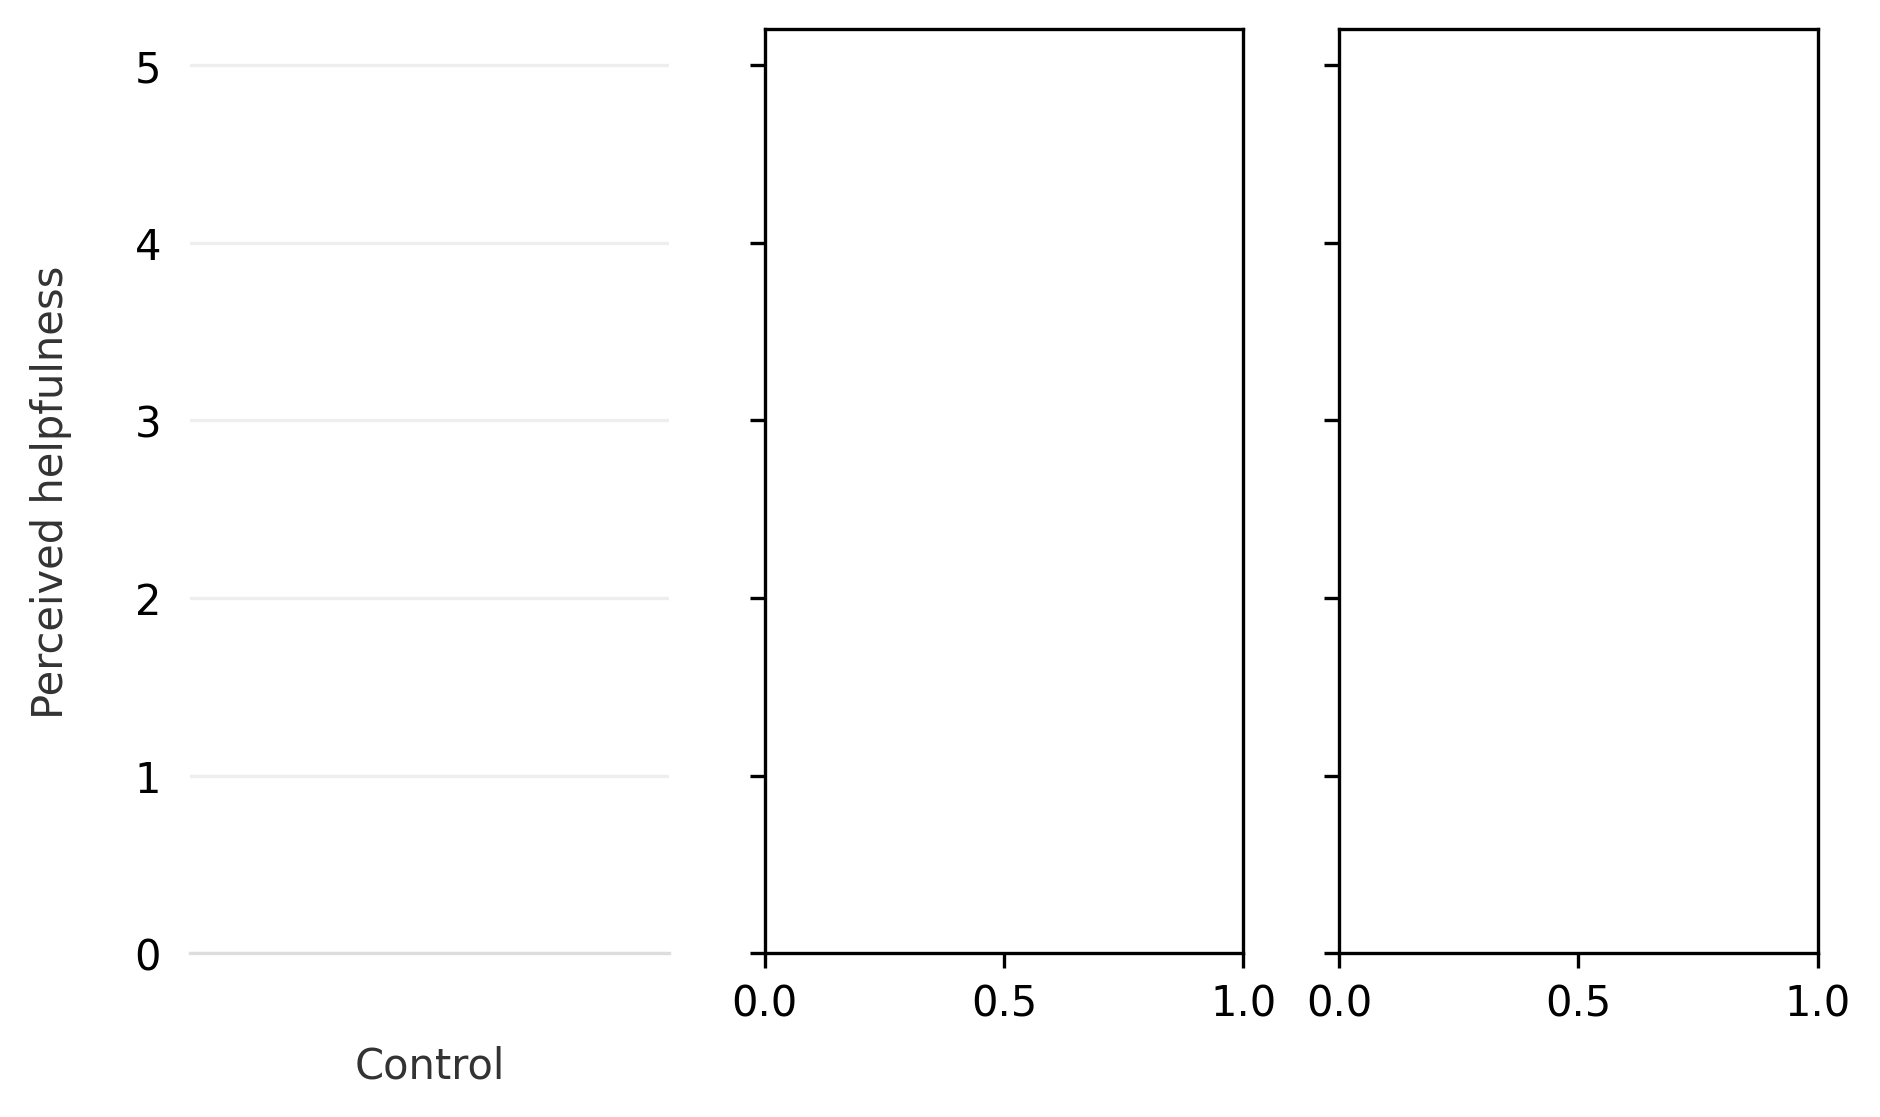

In [33]:
box_plot_measure_by_participant(df, "perceived_helpfulness", ylabel="Perceived helpfulness", ylim=(0, 5.2))

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (6,) and arg 1 with shape (0,).

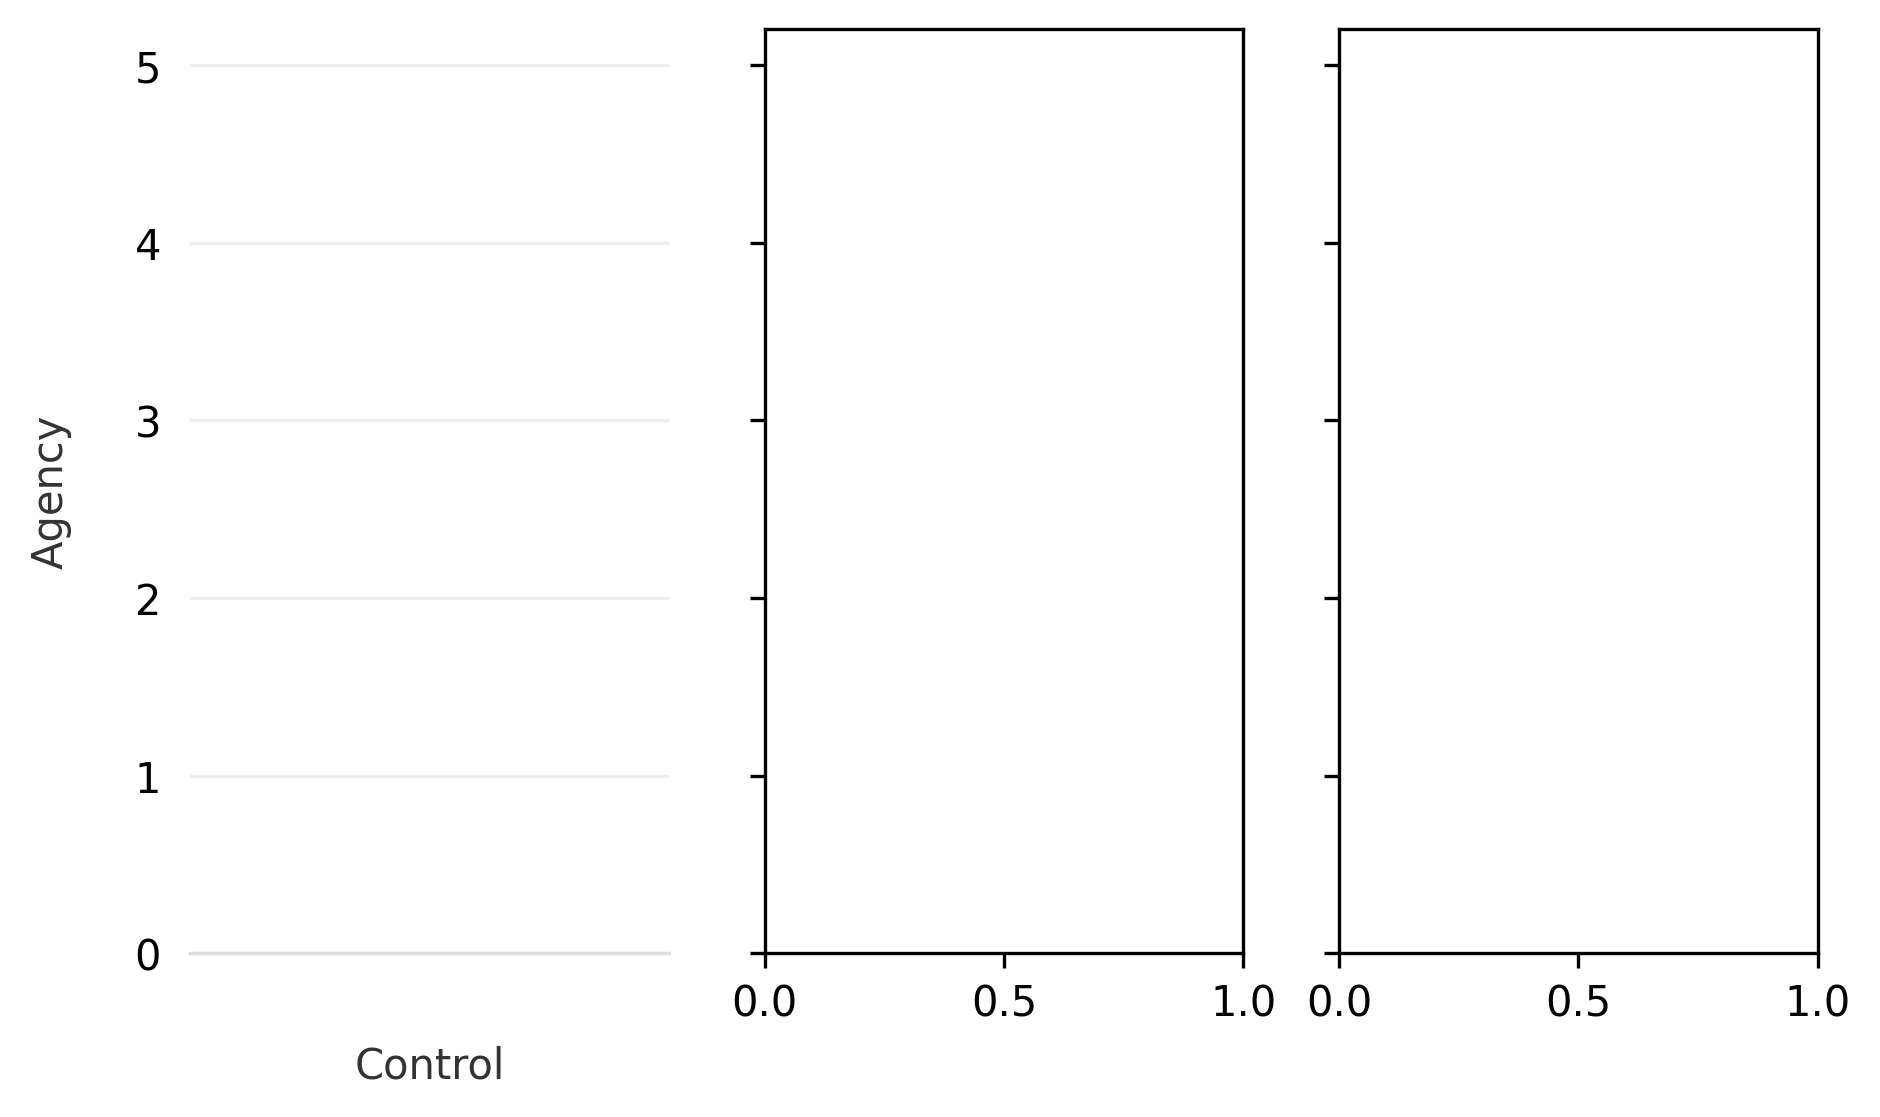

In [34]:
box_plot_measure_by_participant(df, "agency", ylabel="Agency", ylim=(0, 5.2))

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (6,) and arg 1 with shape (0,).

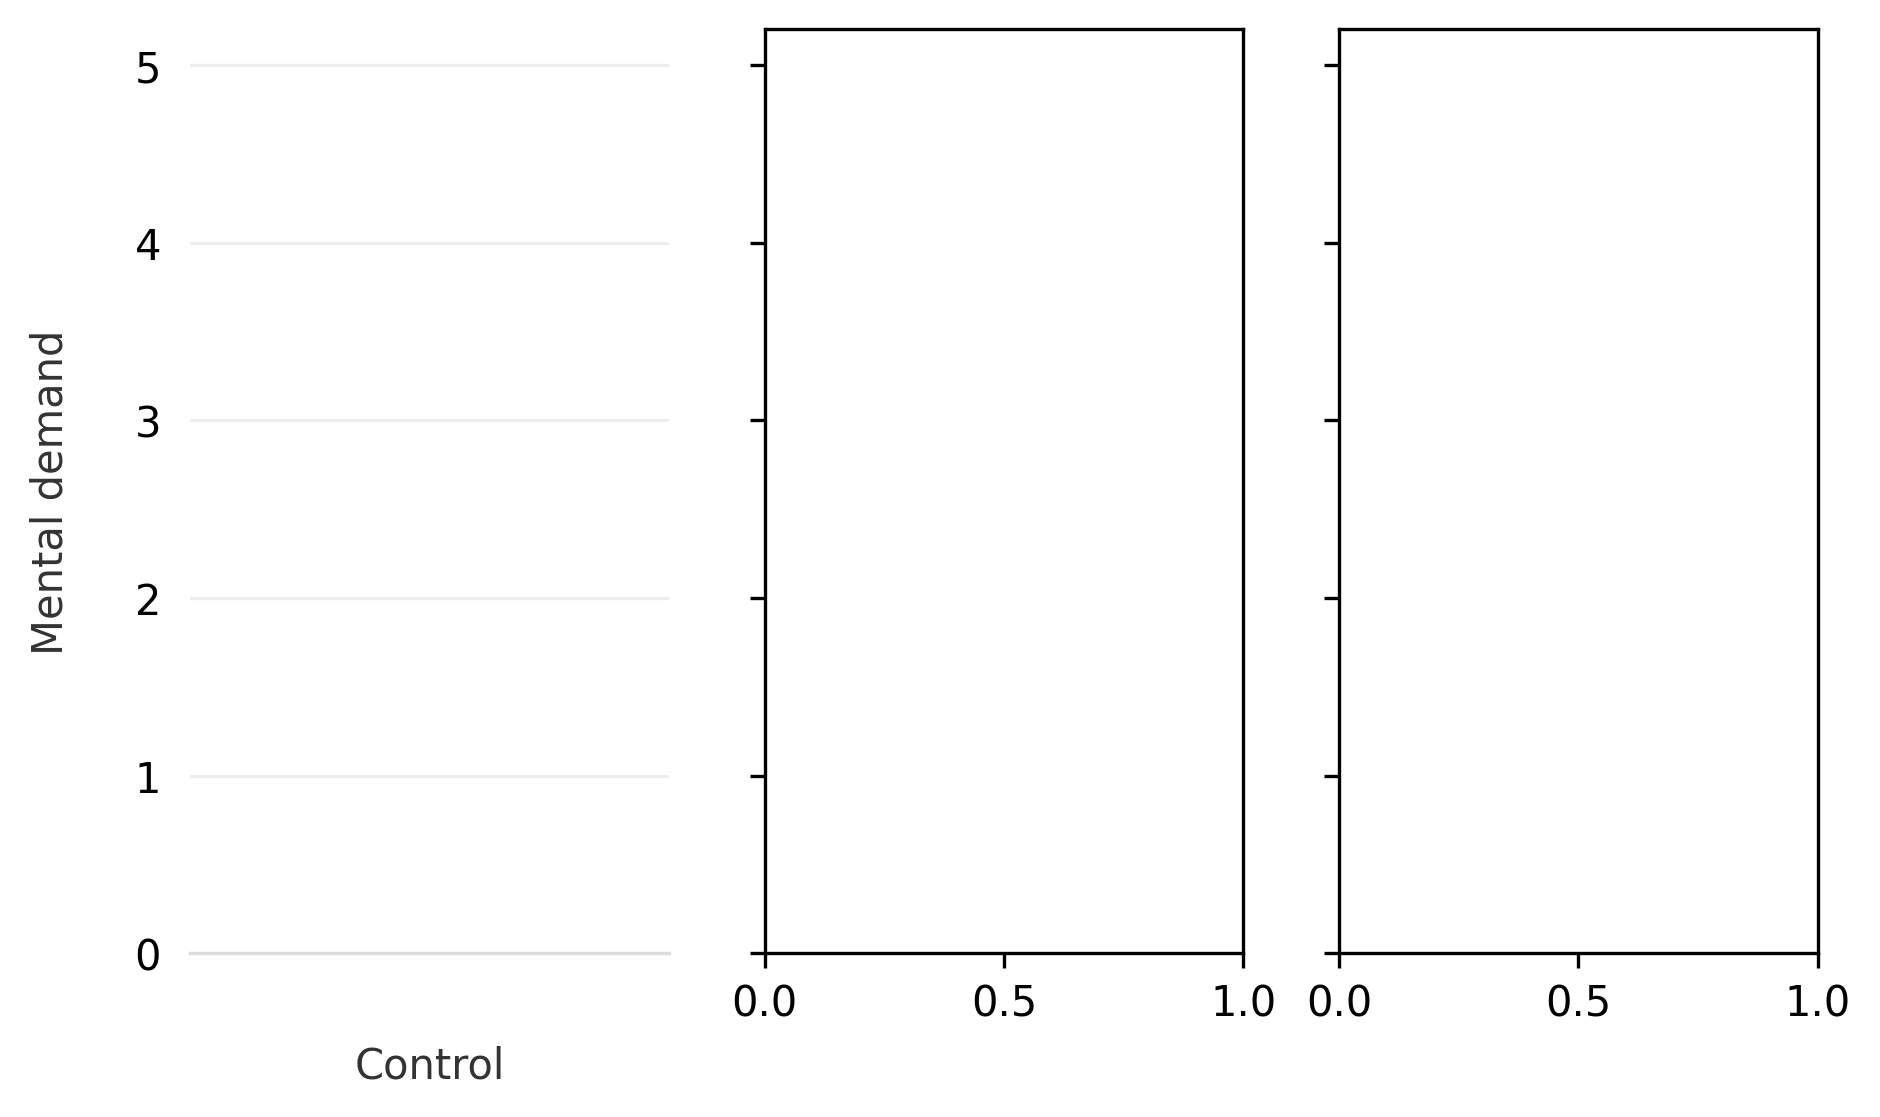

In [35]:
box_plot_measure_by_participant(df, "mental_demand", ylabel="Mental demand", ylim=(0, 5.2))

### AI Trust

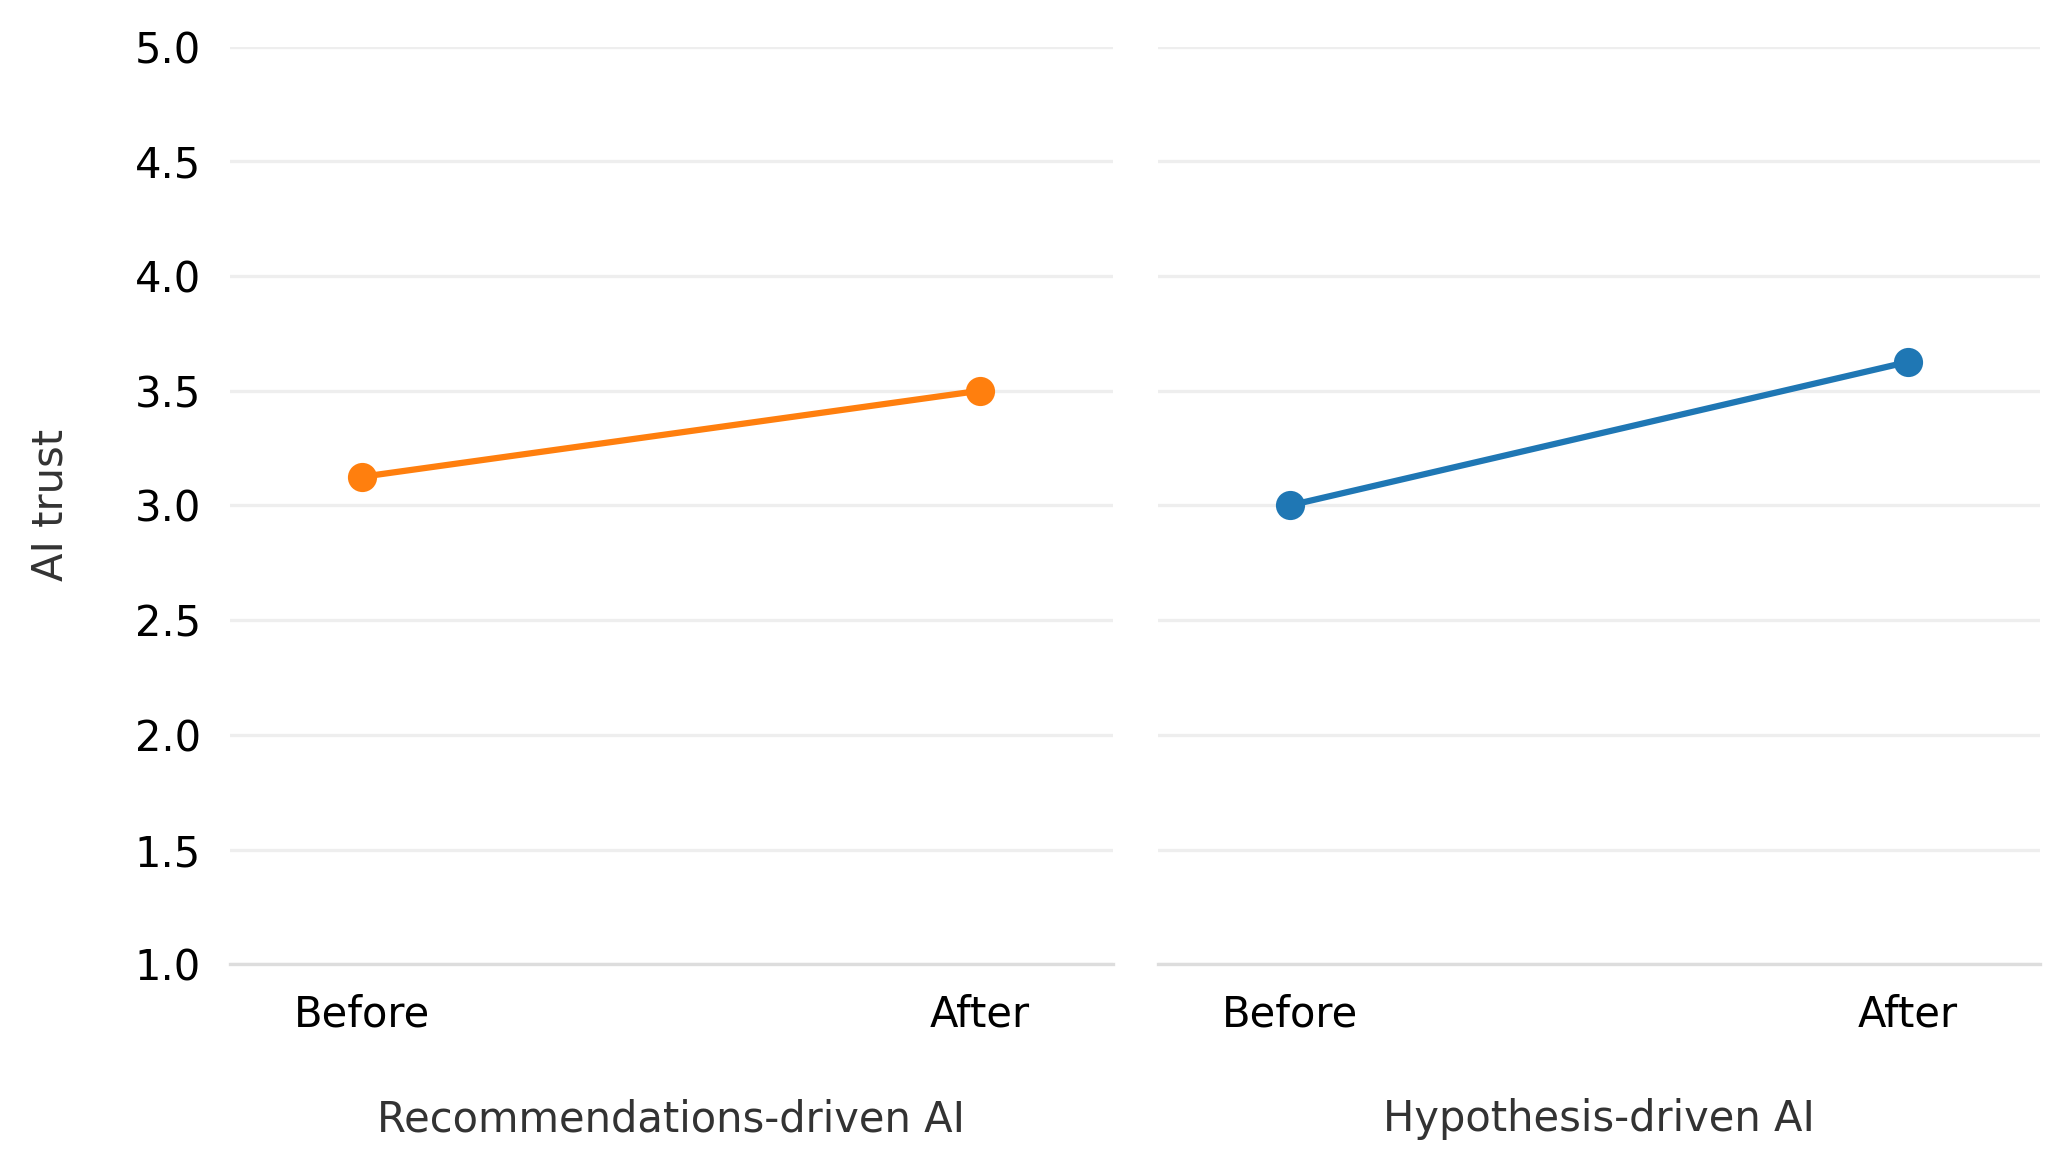

In [36]:
# AI trust before and after the experiment

fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(7, 4), dpi=300)
setup_ax_aesthetics(
    ax1,
    "Recommendations-driven AI",
    "AI trust",
    ylim=(1, 5),
    xlim=(0, 1),
)
setup_ax_aesthetics(
    ax2,
    "Hypothesis-driven AI",
    "",
    ylim=(1, 5),
    xlim=(0, 1),
)

x_positions = [0.15, 0.85]
for ax, data in zip(
    [ax1, ax2],
    [
        df[df["group"] == "Recommendations-driven AI"],
        df[df["group"] == "Hypothesis-driven AI"],
    ],
):
    ax.set_xticks(x_positions, labels=["Before", "After"])
    ax.plot(
        x_positions,
        data[["ai_trust_before", "ai_trust_after"]].T,
        "o-",
        color=GROUP_COLORS[data["group"].iloc[0]],
    )

plt.tight_layout()
plt.show()

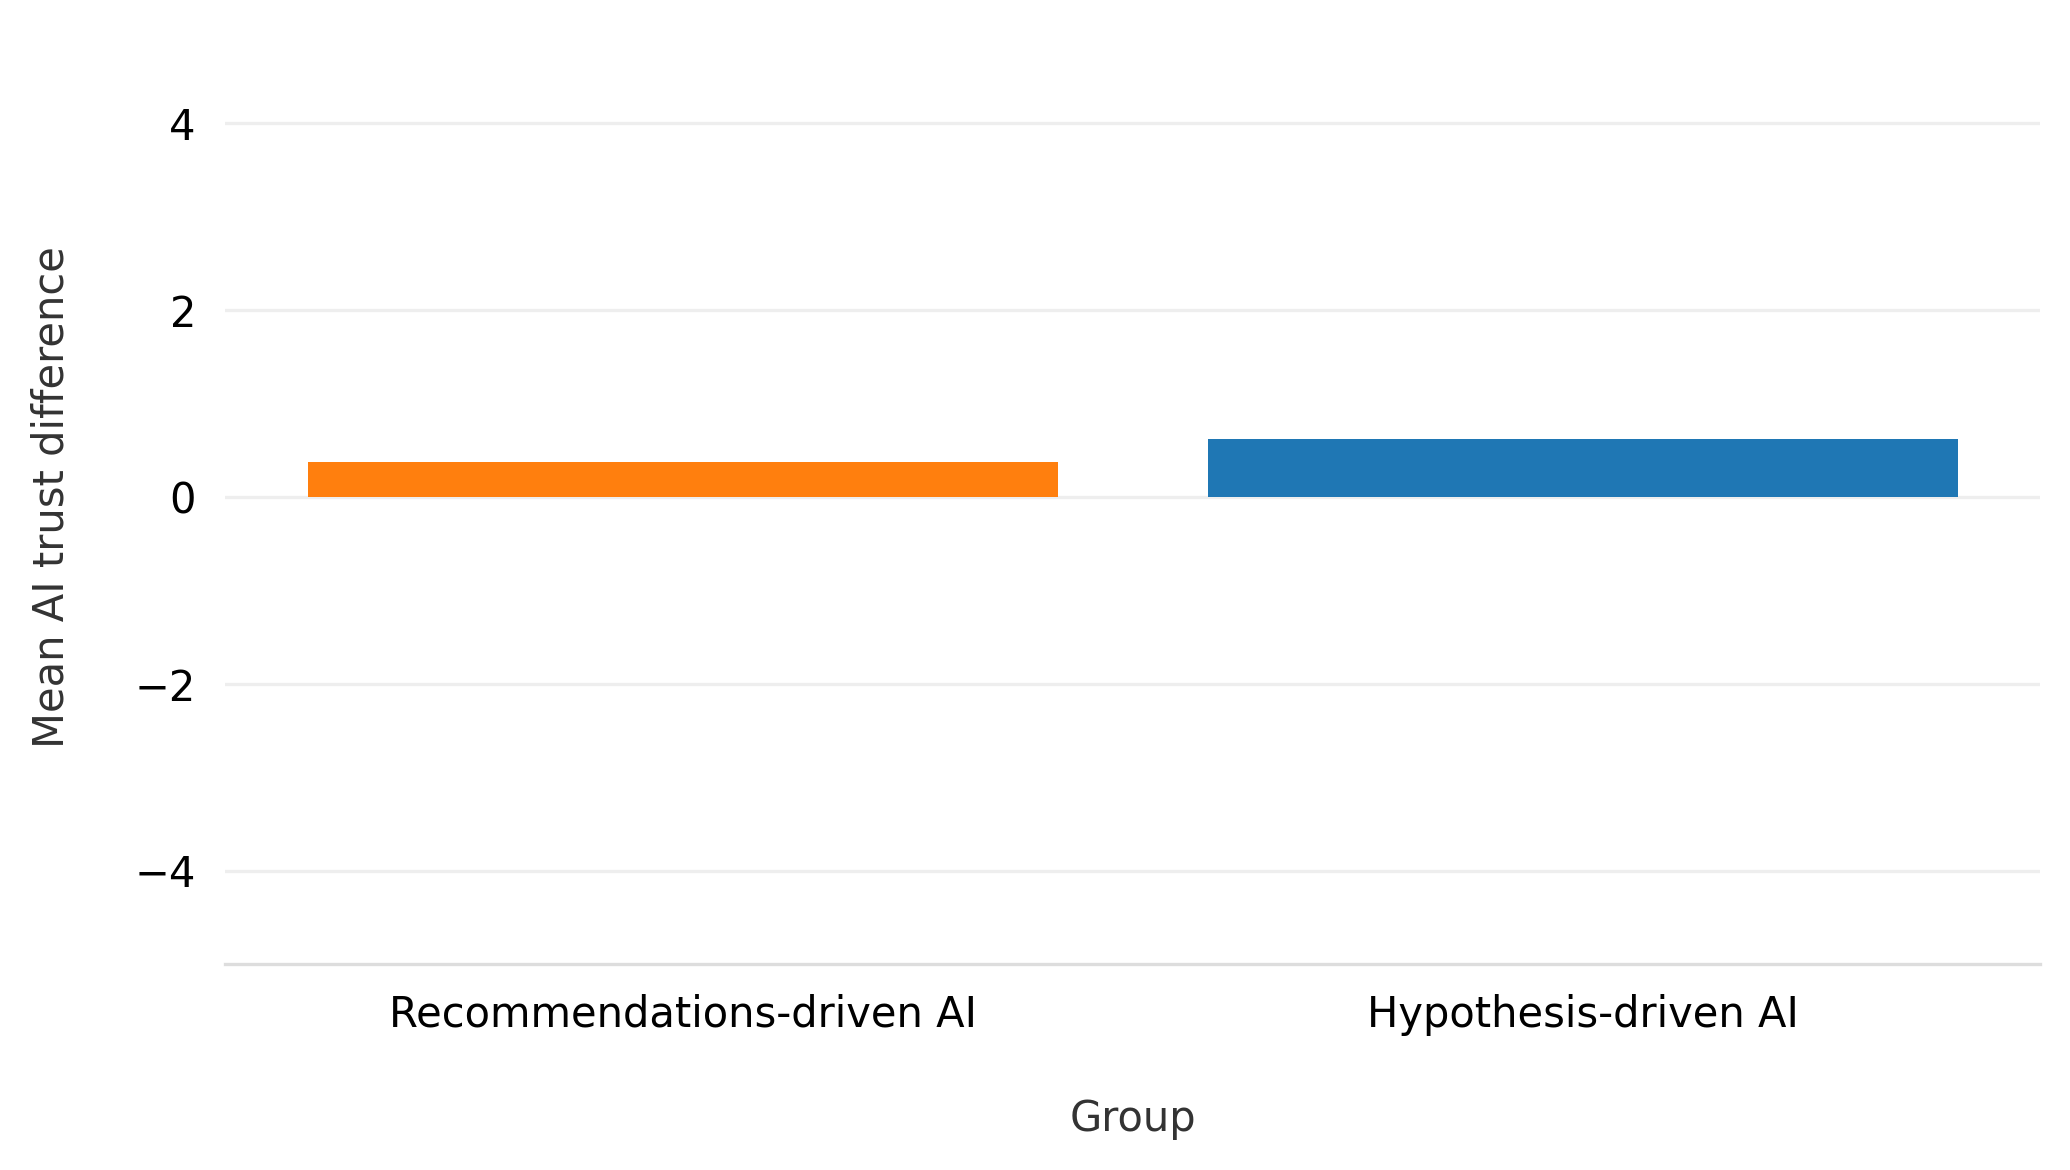

In [37]:
# AI trust difference grouped by group

fig, ax = plt.subplots(figsize=(7, 4), dpi=300)
setup_ax_aesthetics(
    ax,
    "Group",
    "Mean AI trust difference",
    ylim=(-5, 5),
)

x_positions = [0, 0.6]
ax.set_xticks(x_positions, labels=["Recommendations-driven AI", "Hypothesis-driven AI"])
ax.bar(
    x_positions,
    [
        df[df["group"] == "Recommendations-driven AI"]["ai_trust_diff"].mean(),
        df[df["group"] == "Hypothesis-driven AI"]["ai_trust_diff"].mean(),
    ],
    color=[
        GROUP_COLORS[group]
        for group in ["Recommendations-driven AI", "Hypothesis-driven AI"]
    ],
    width=0.5,
    align="center",
)

plt.tight_layout()
plt.show()

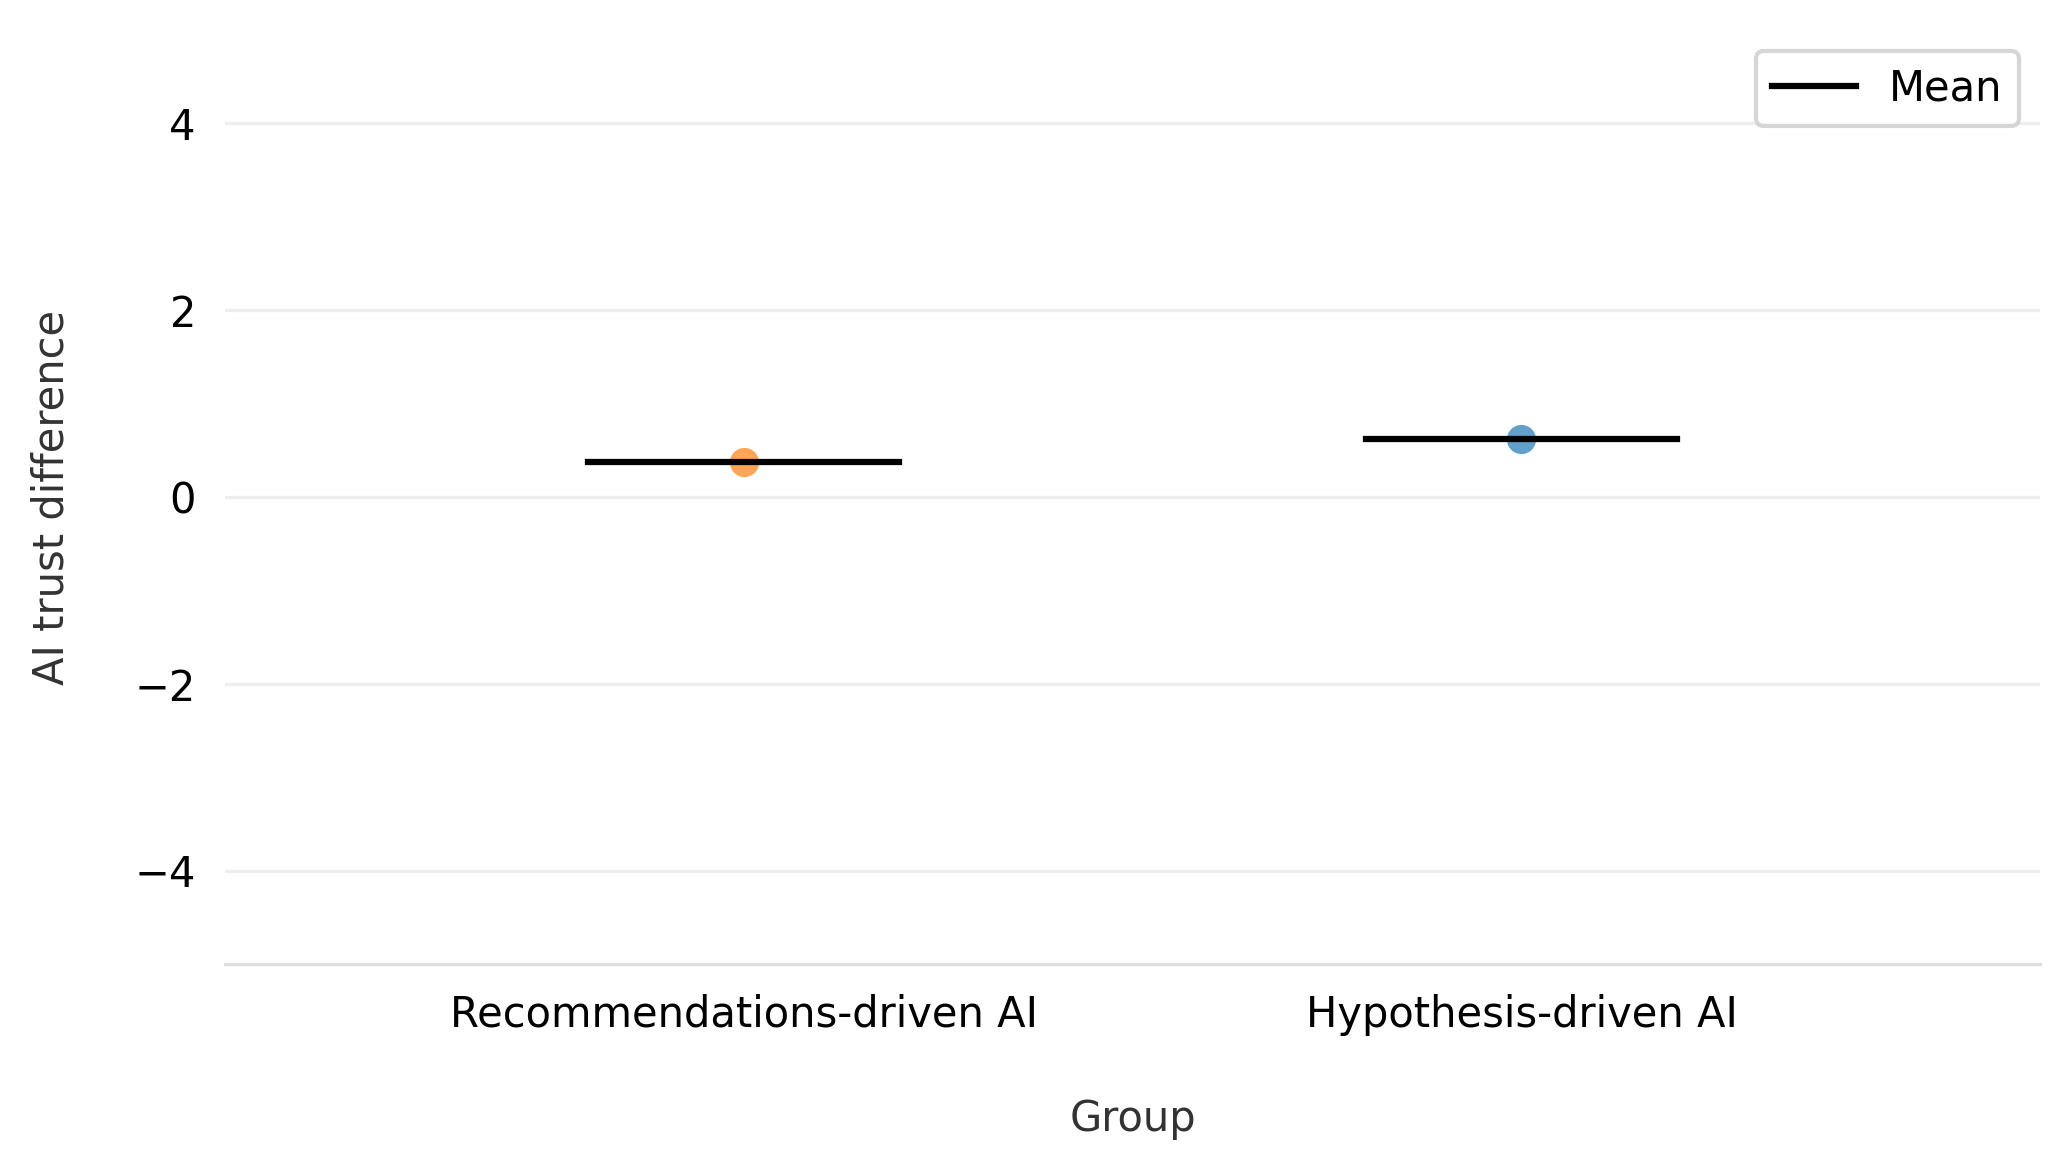

In [38]:
# AI trust difference grouped by group

fig, ax = plt.subplots(figsize=(7, 4), dpi=300)
setup_ax_aesthetics(
    ax,
    "Group",
    "AI trust difference",
    ylim=(-5, 5),
)
ax.set_xlim(-0.1, 0.25)



x_positions = [0, 0.15]

ax.set_xticks(x_positions, labels=["Recommendations-driven AI", "Hypothesis-driven AI"])

y_recommendations = df[df["group"] == "Recommendations-driven AI"]["ai_trust_diff"]
y_hypothesis = df[df["group"] == "Hypothesis-driven AI"]["ai_trust_diff"]

ax.plot(
    [x_positions[0]] * len(y_recommendations),
    y_recommendations,
    "o",
    markersize=7,
    alpha=0.7,
    color=GROUP_COLORS["Recommendations-driven AI"],
    markeredgecolor="none"
)
ax.plot(
    [x_positions[0] - 0.03, x_positions[0] + 0.03],
    [y_recommendations.mean()] * 2,
    "-k",
    # color=GROUP_COLORS["Recommendations-driven AI"],
    label="Mean",
)

ax.plot(
    [x_positions[1]] * len(y_hypothesis),
    y_hypothesis,
    "o",
    markersize=7,
    alpha=0.7,
    color=GROUP_COLORS["Hypothesis-driven AI"],
    markeredgecolor="none"
)
ax.plot(
    [x_positions[1] - 0.03, x_positions[1] + 0.03],
    [y_hypothesis.mean()] * 2,
    "-k",
    # color=GROUP_COLORS["Hypothesis-driven AI"],
)

ax.legend()

plt.tight_layout()
plt.show()

### Case-specific Measures

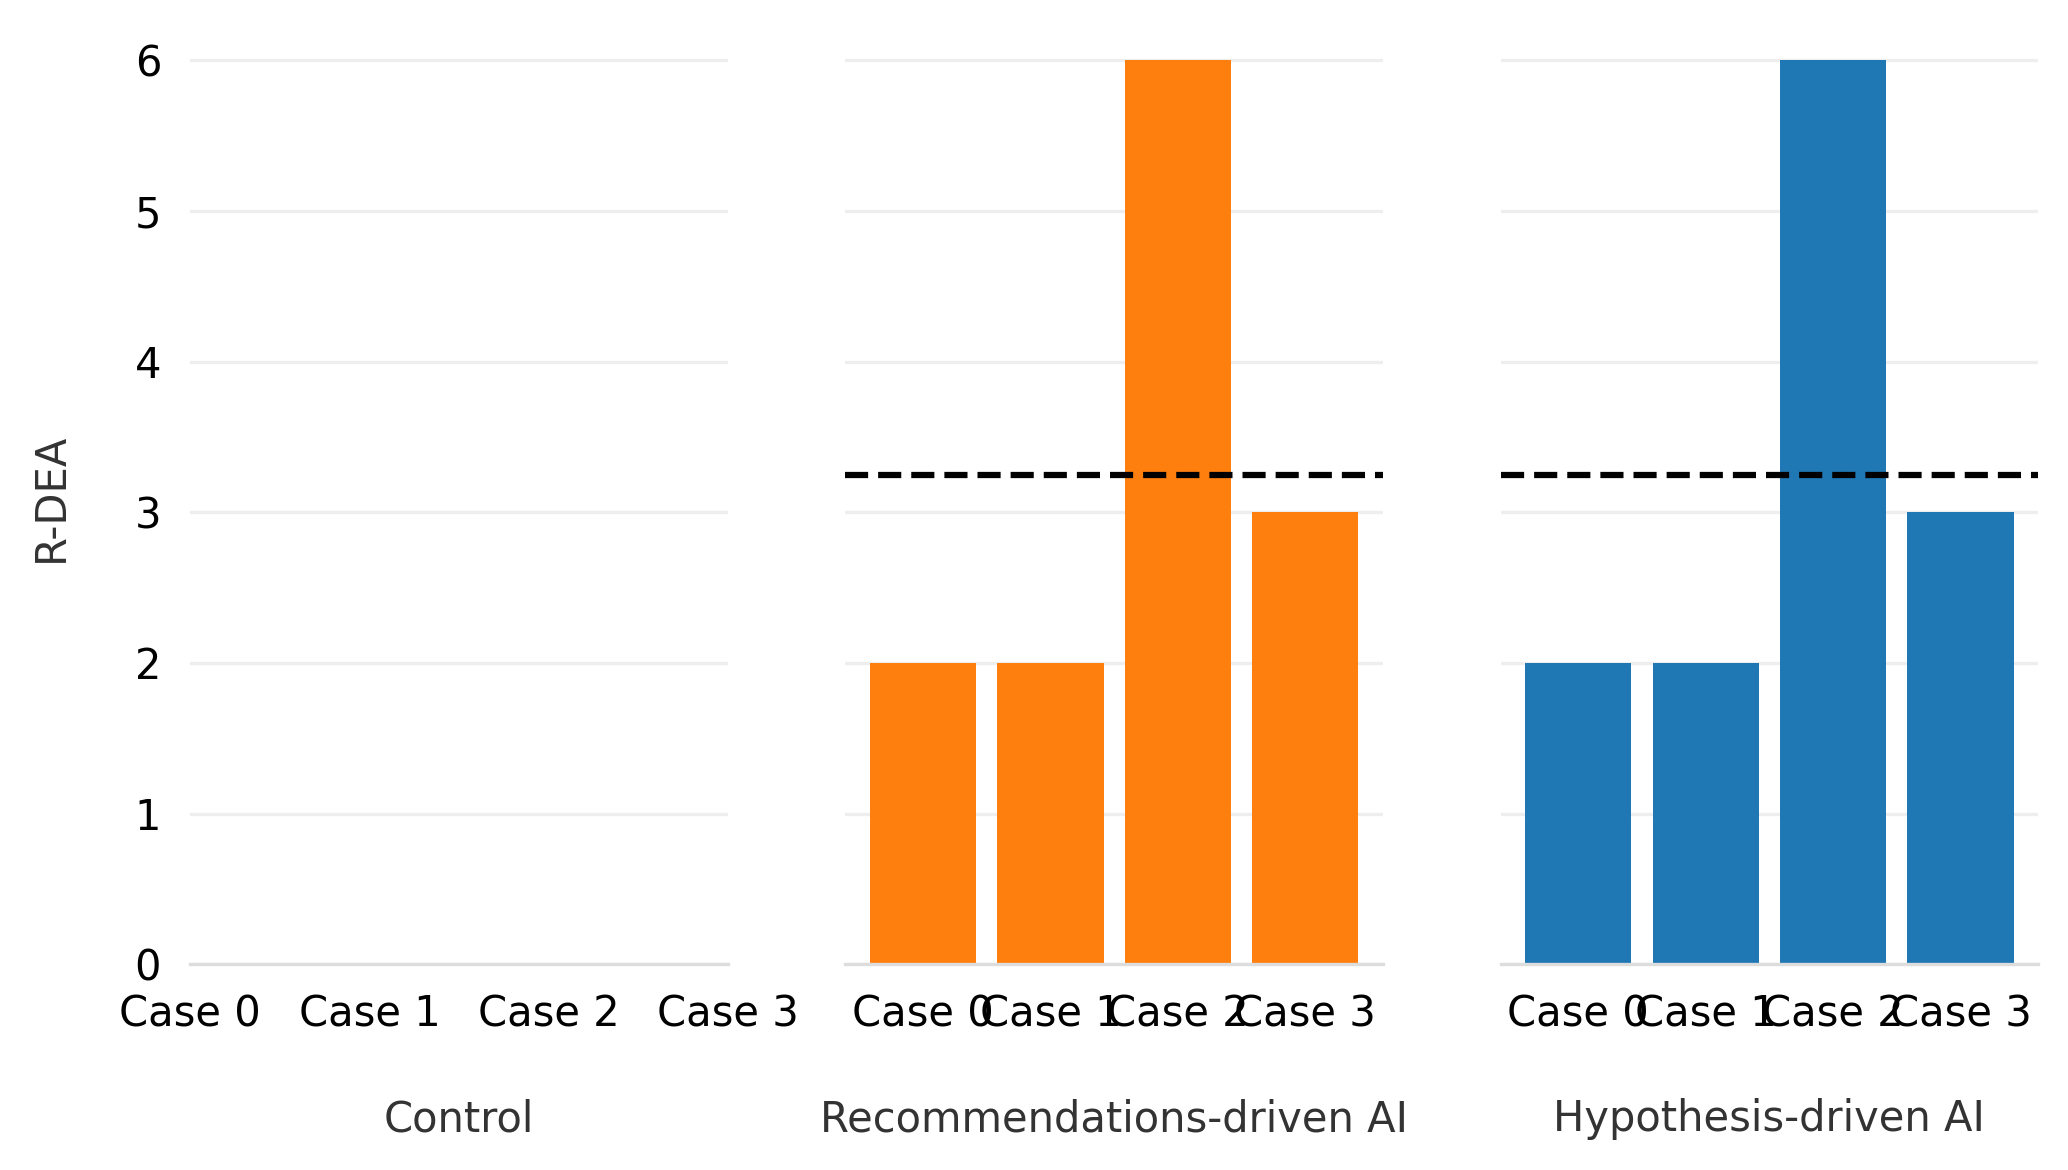

In [39]:
box_plot_measure_by_case(df, "R-DEA", [0,6.2])

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (3,) and arg 1 with shape (4,).

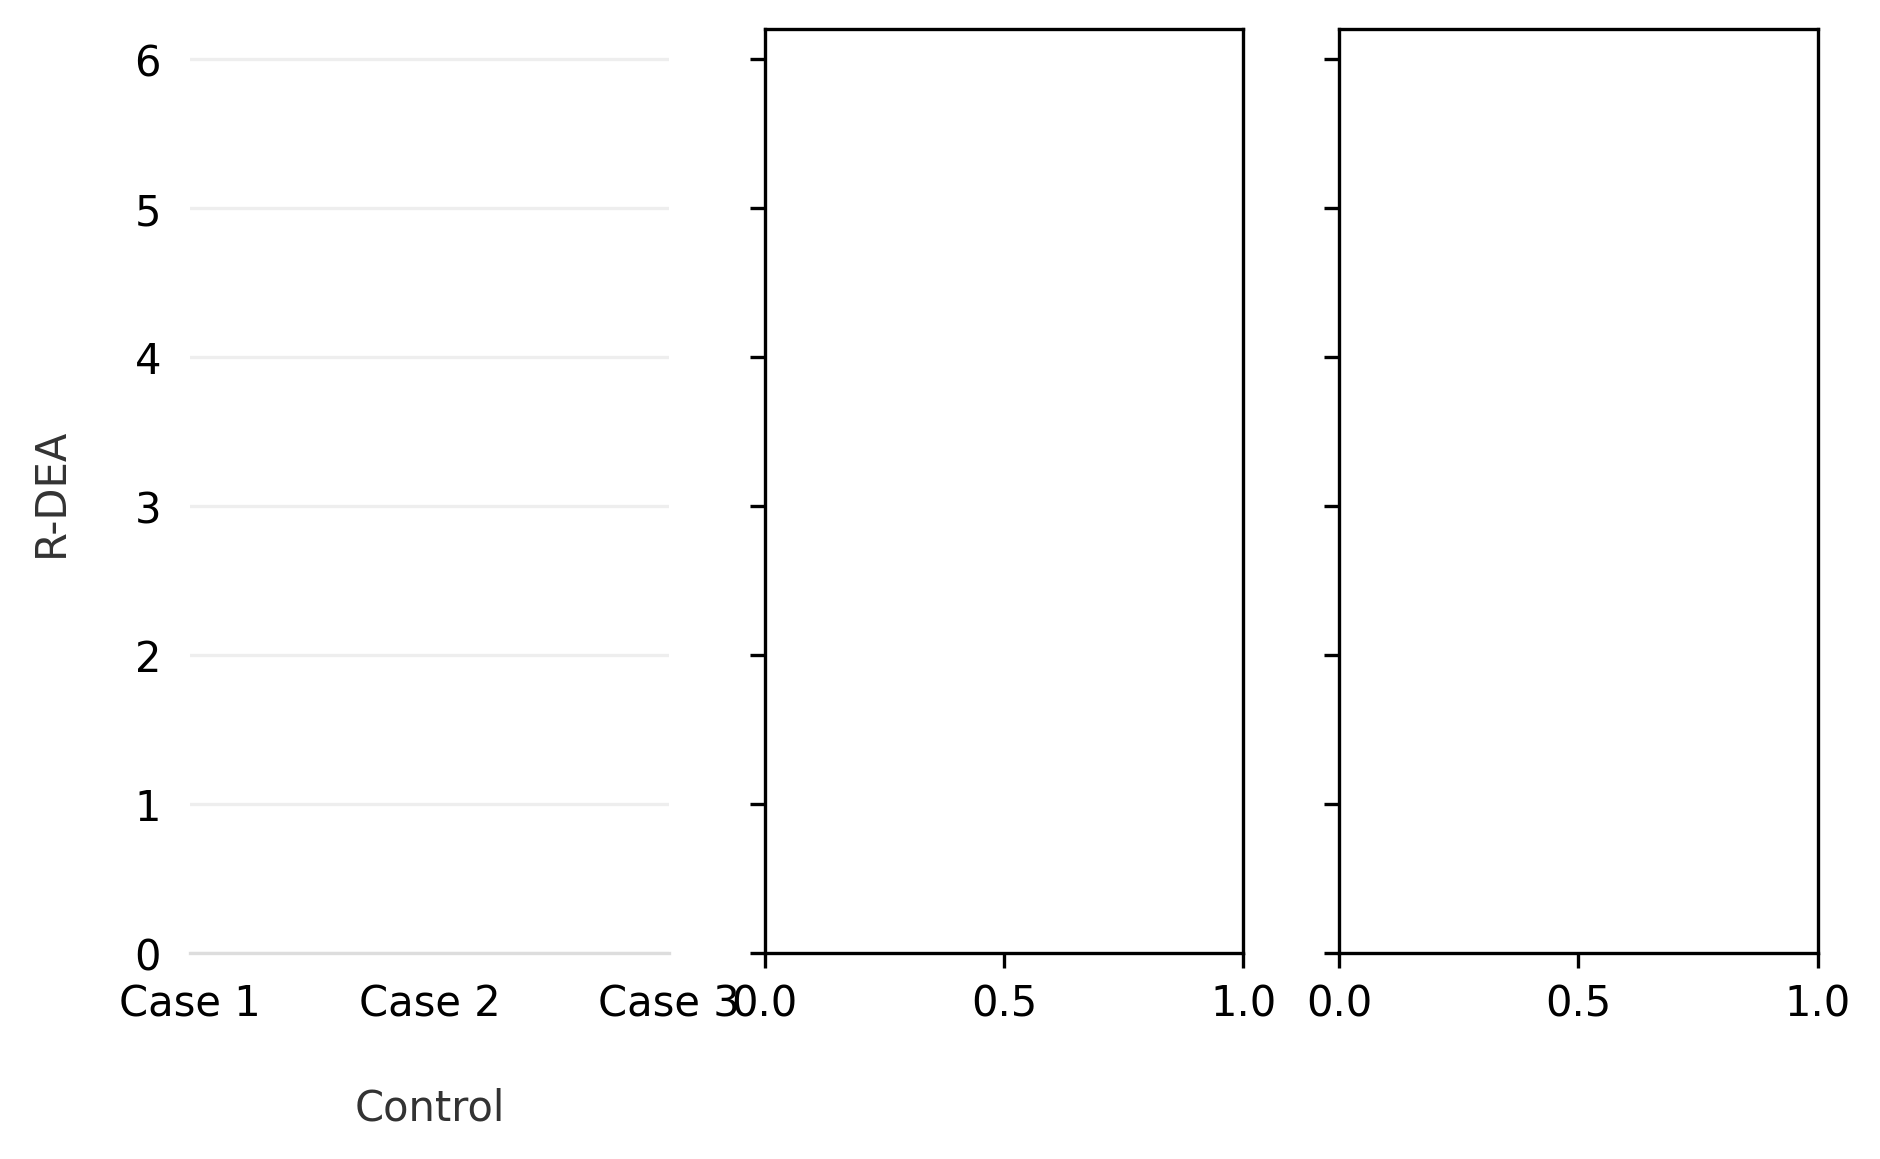

In [40]:
scatter_plot_measure_by_case(df, "R-DEA", ylim=[0,6.2])

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (6,) and arg 1 with shape (0,).

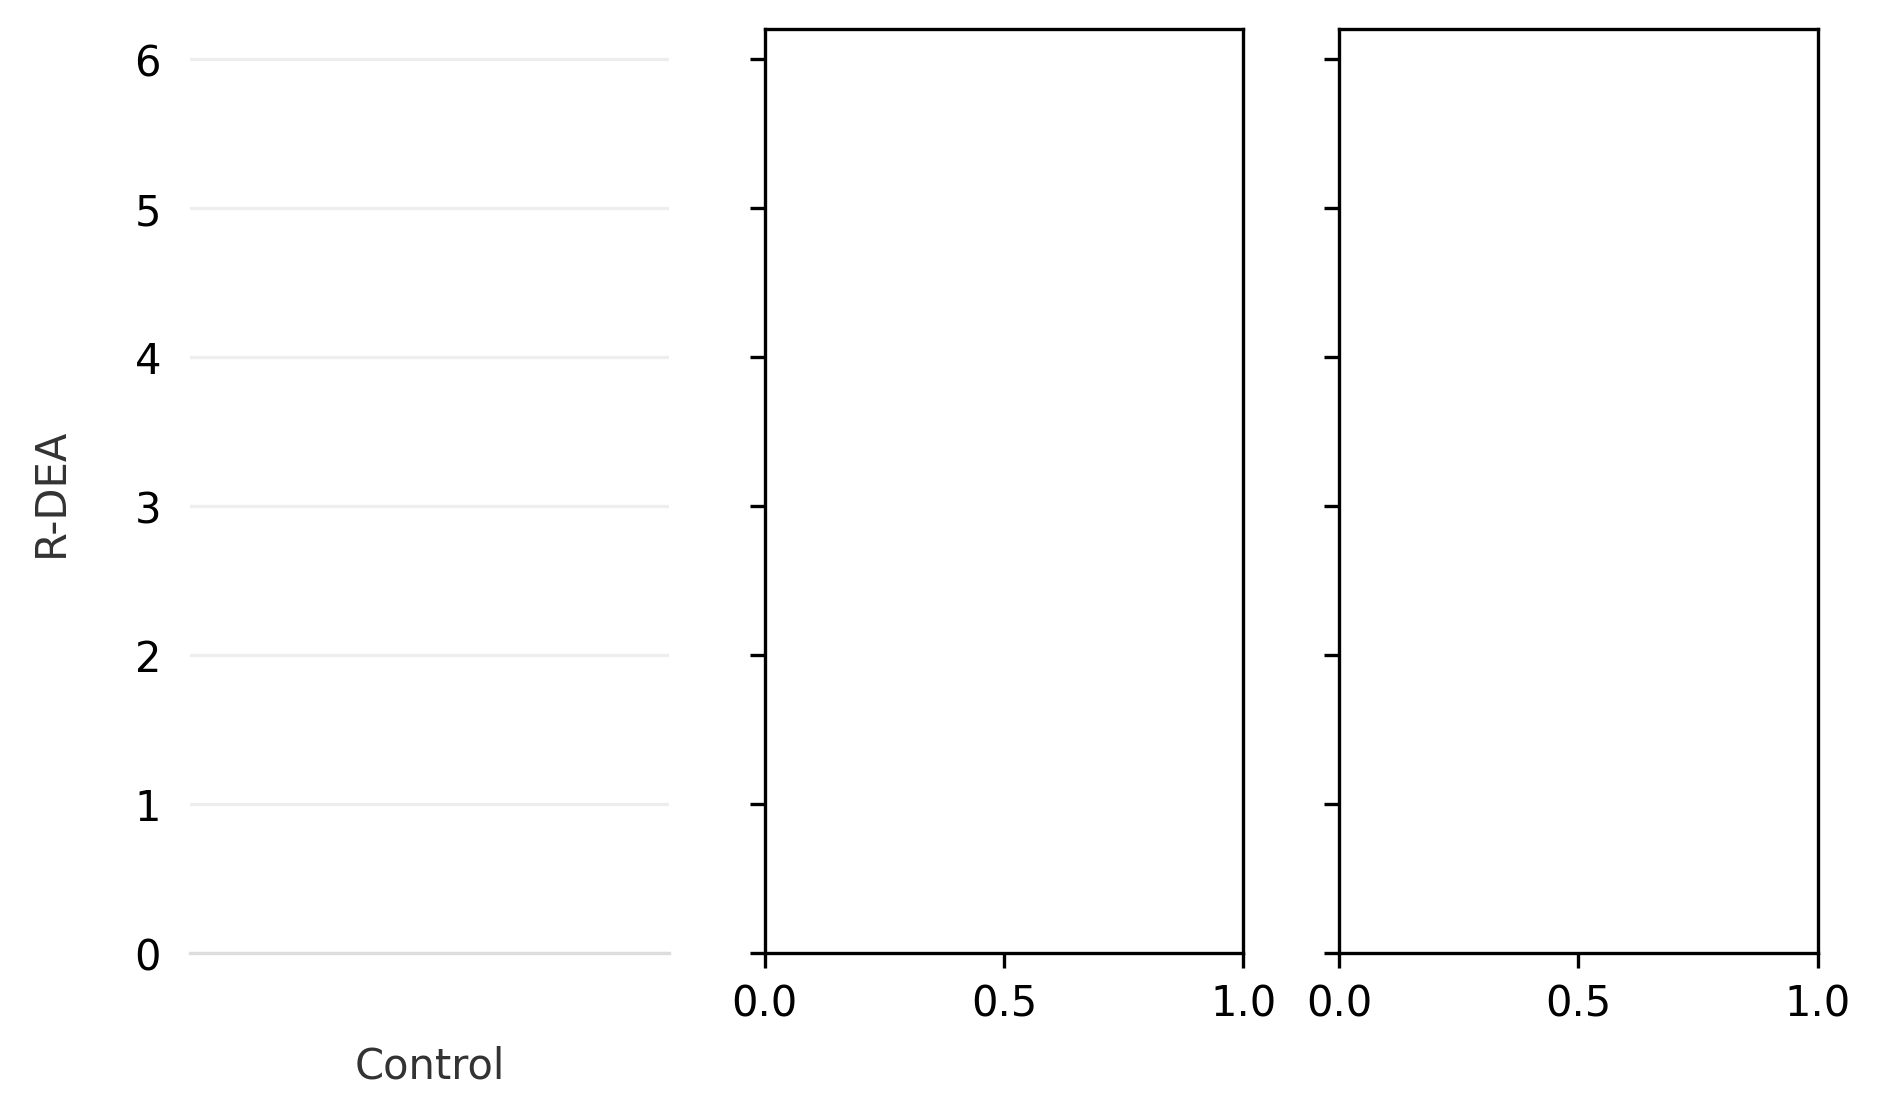

In [41]:
box_plot_measure_by_participant(df, "mean_r_dea", ylabel="R-DEA", ylim=[0, 6.2])

ValueError: x and y must be the same size

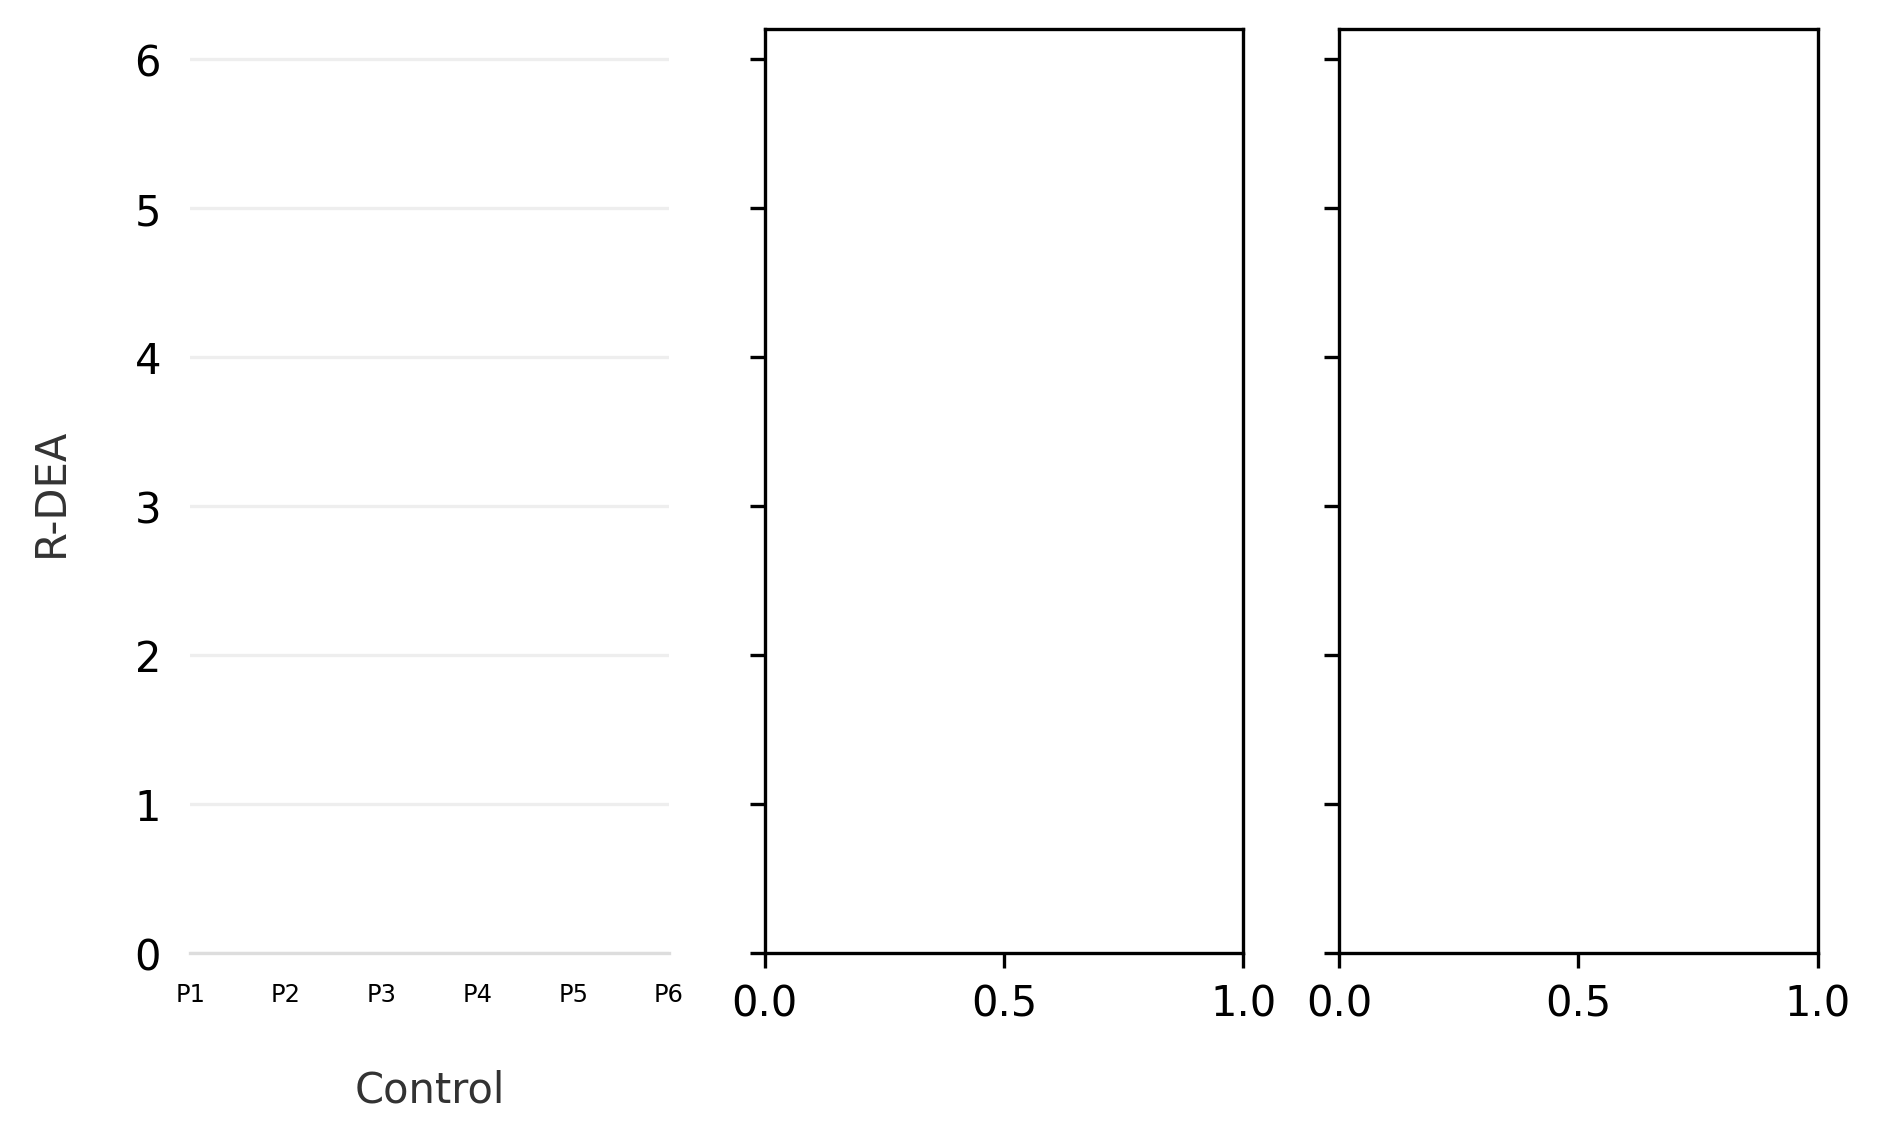

In [42]:
scatter_plot_measure_by_participant(df, "R-DEA", measure_mean="mean_r_dea", ylabel="R-DEA", ylim=[0, 6.2])

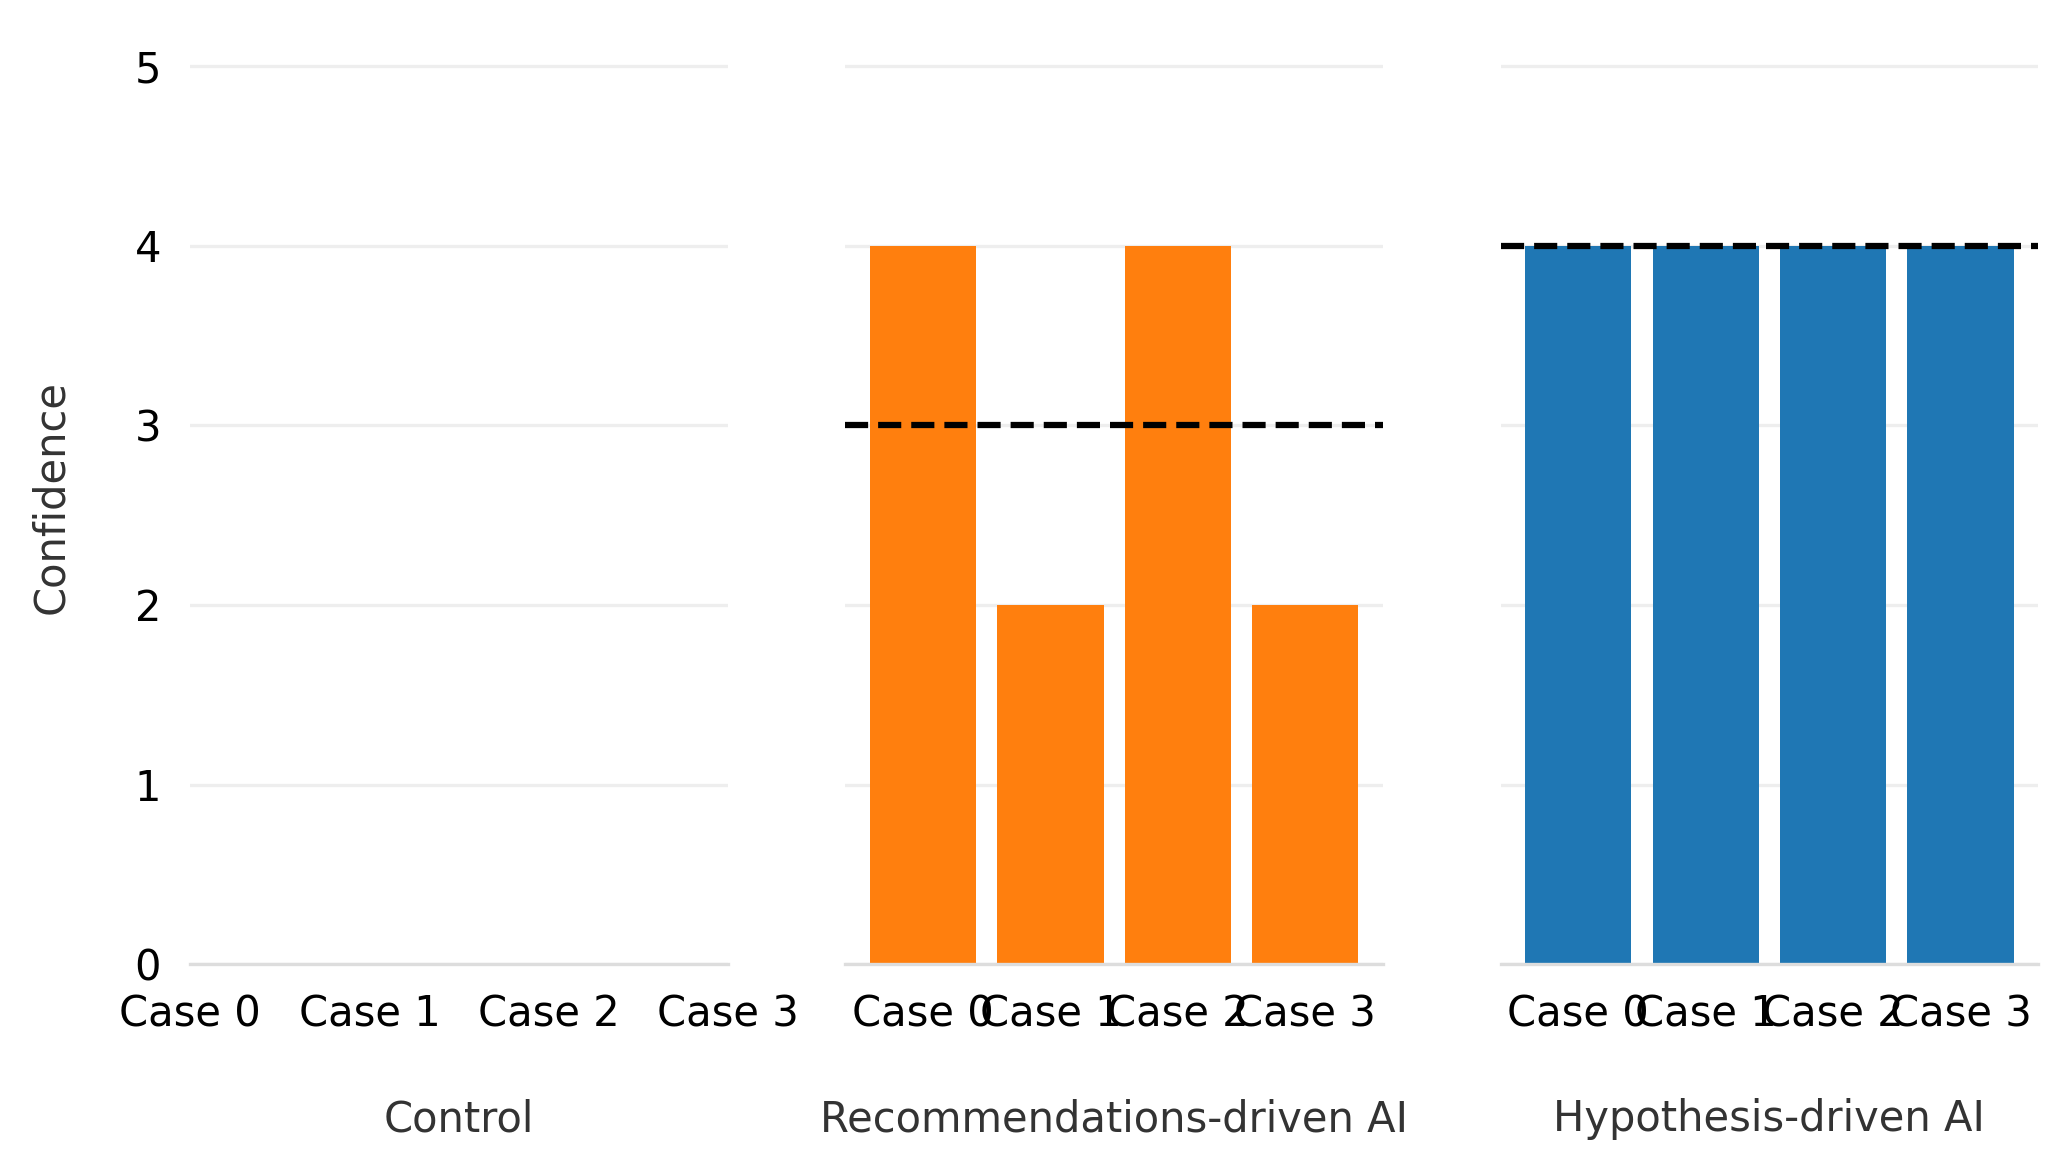

In [43]:
box_plot_measure_by_case(df, "confidence_level", [0,5.2], "Confidence")

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (3,) and arg 1 with shape (4,).

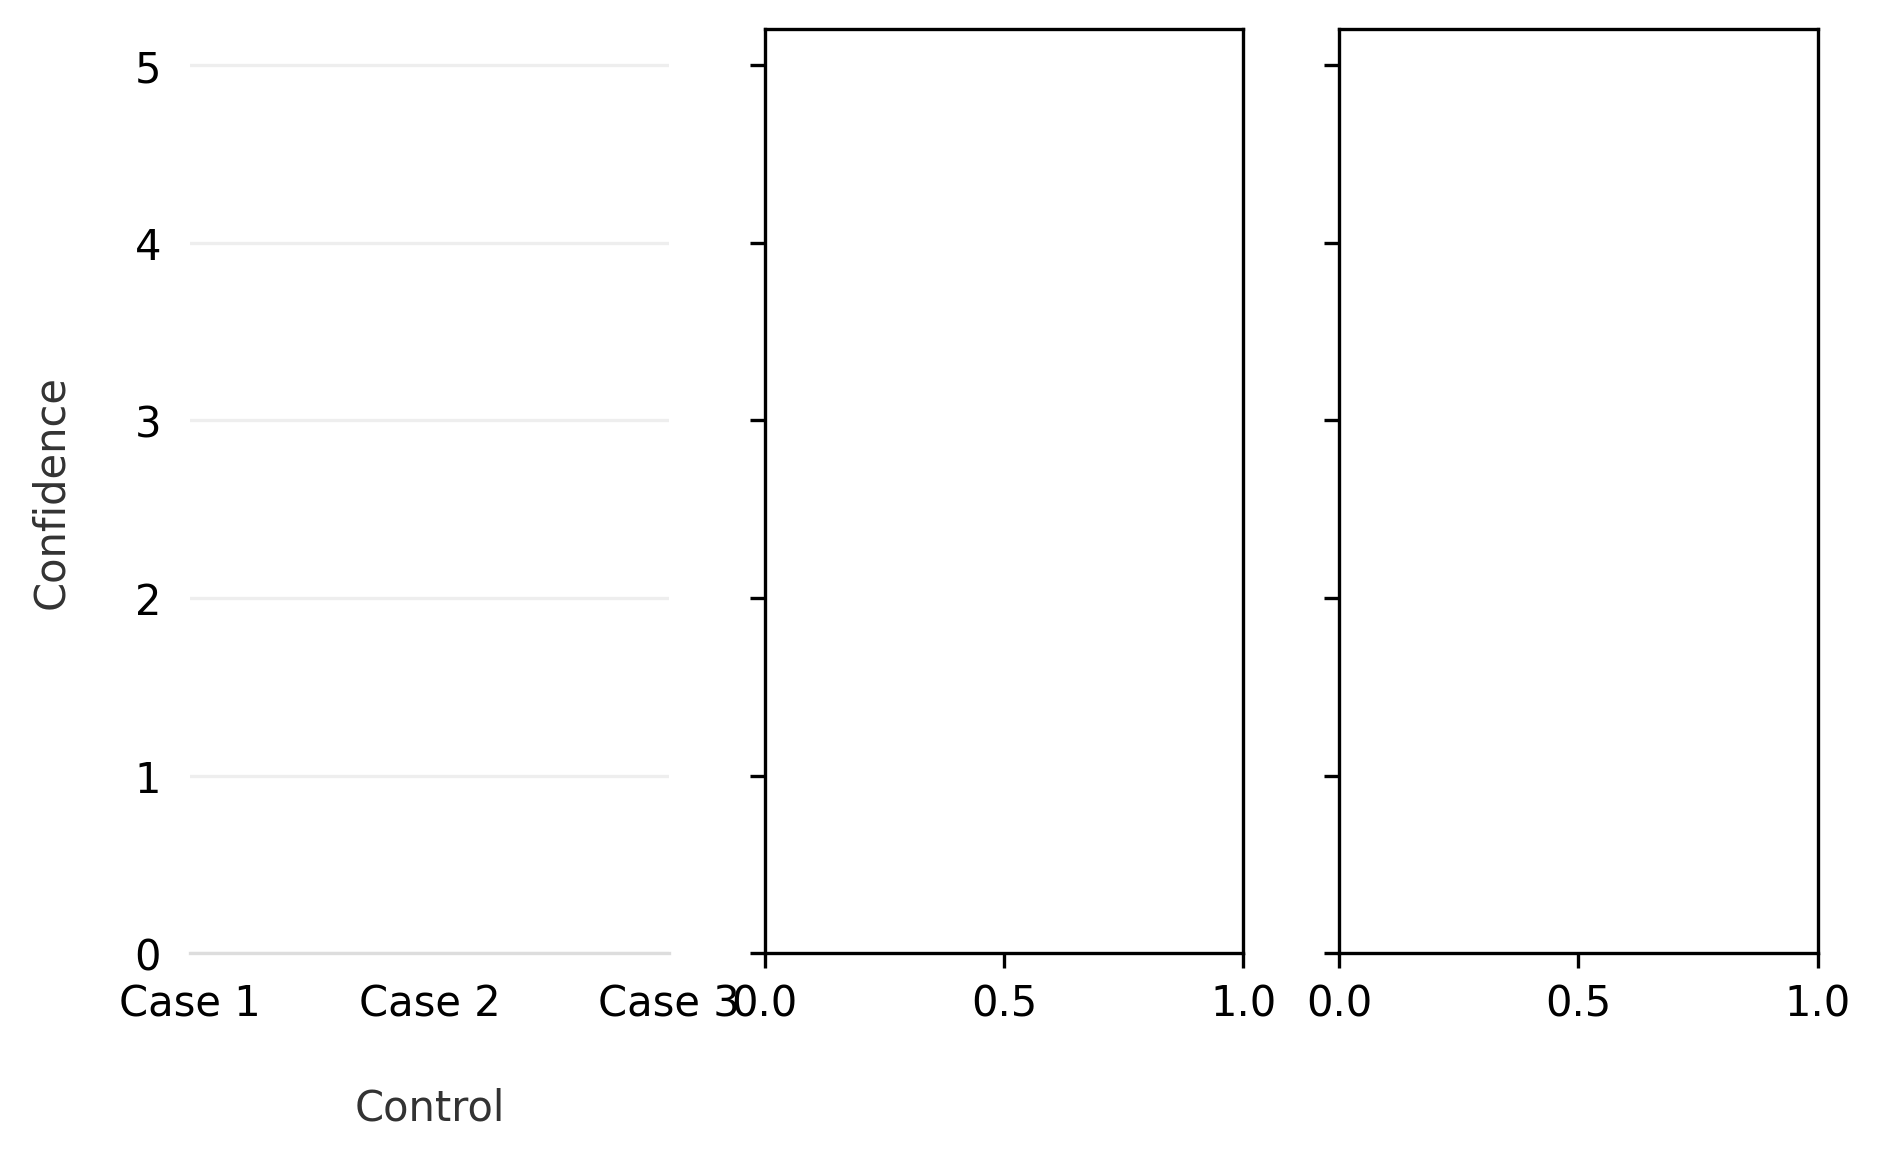

In [44]:
scatter_plot_measure_by_case(df, "confidence_level", [0,5.2], "Confidence")

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (6,) and arg 1 with shape (0,).

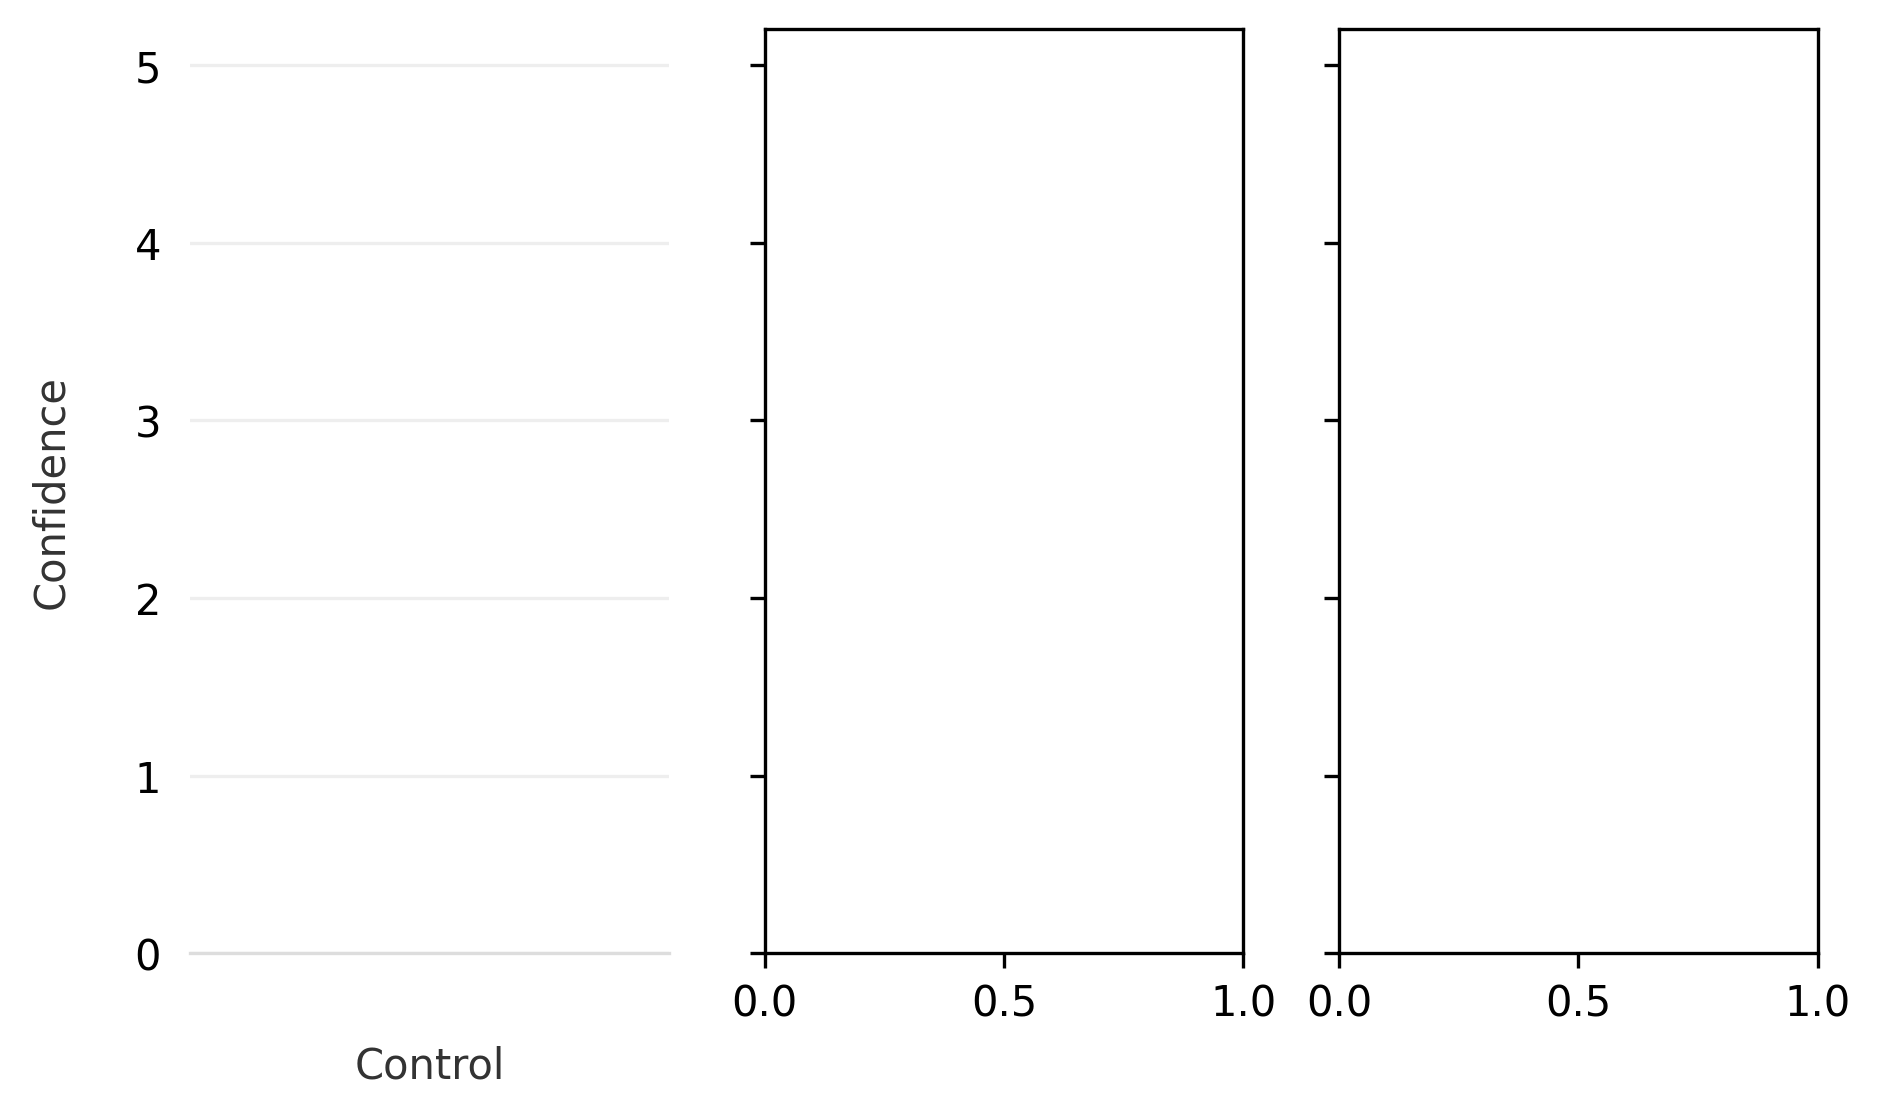

In [45]:
box_plot_measure_by_participant(df, "mean_confidence", ylabel="Confidence", ylim=[0, 5.2])

ValueError: x and y must be the same size

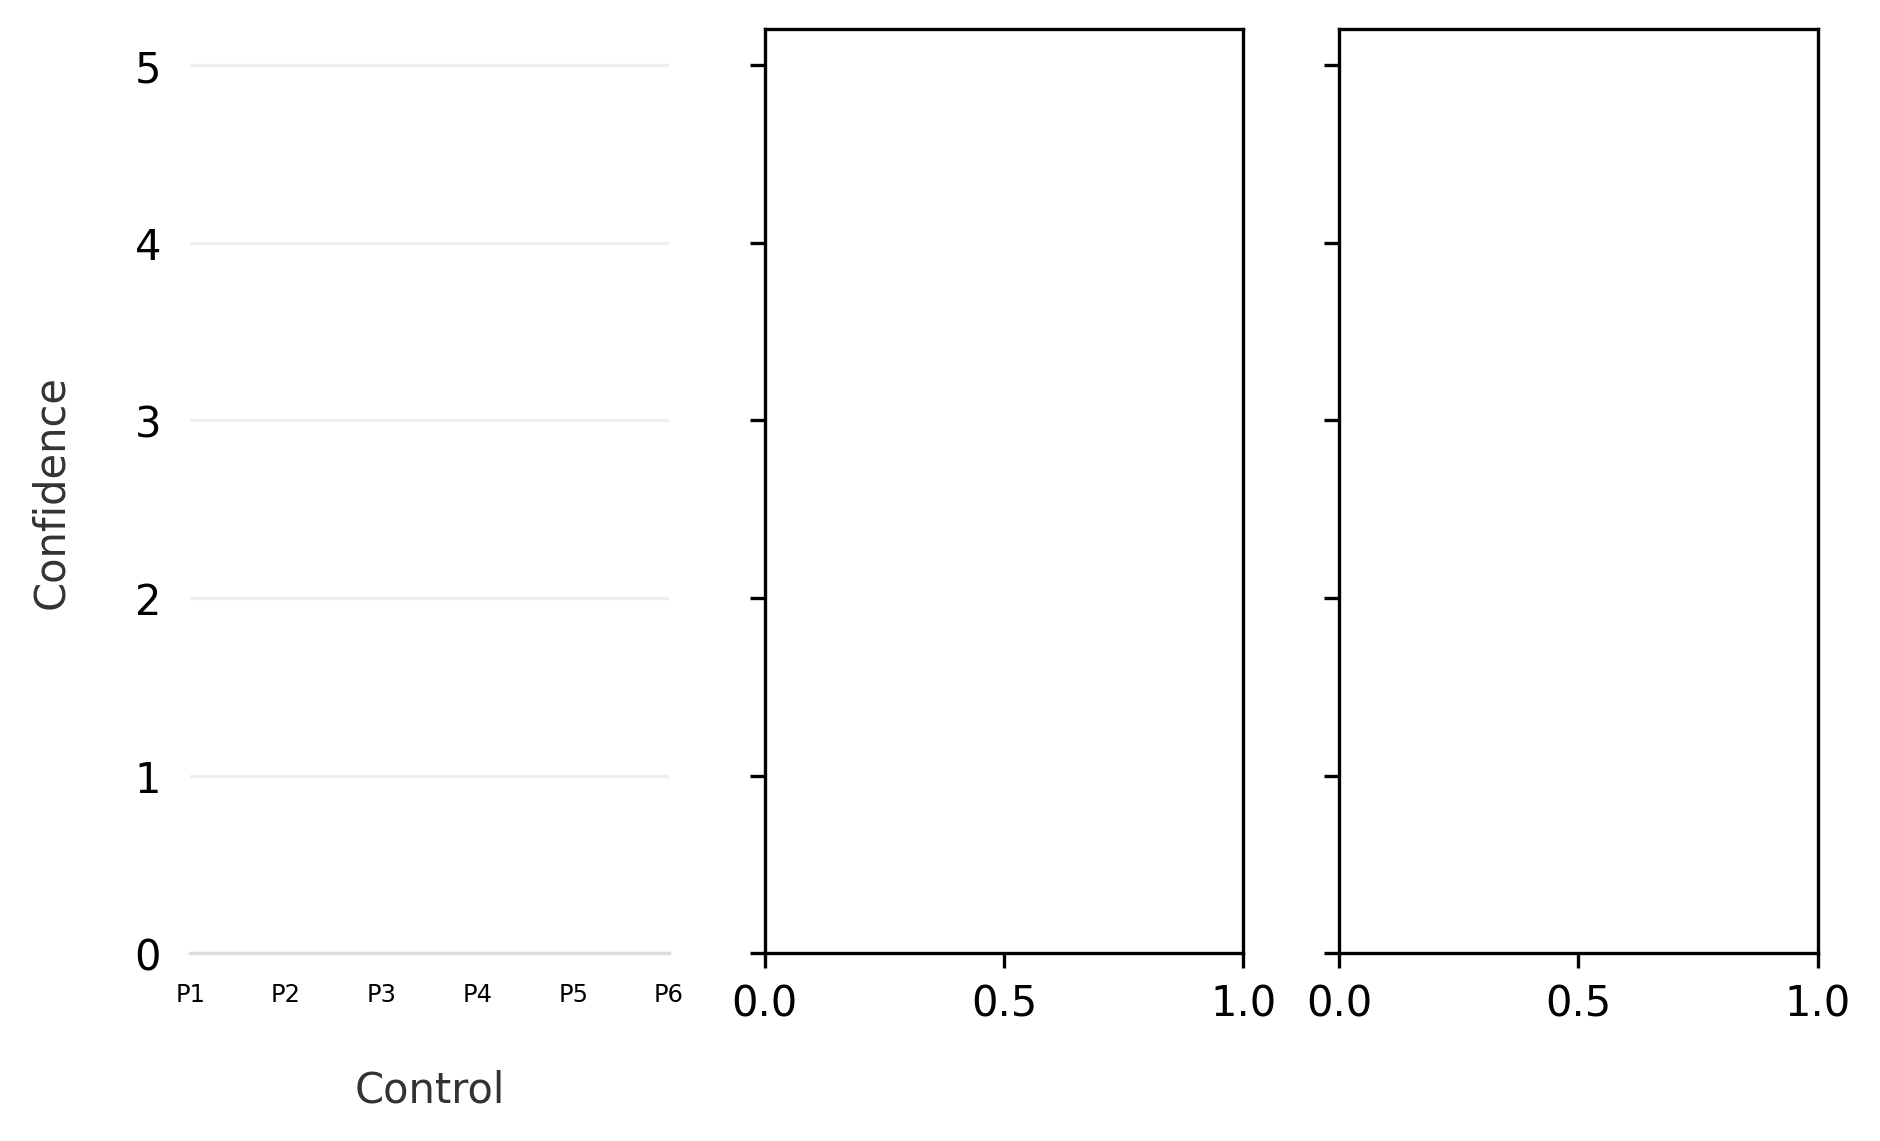

In [46]:
scatter_plot_measure_by_participant(df, "confidence_level", measure_mean="mean_confidence", ylabel="Confidence", ylim=[0, 5.2])

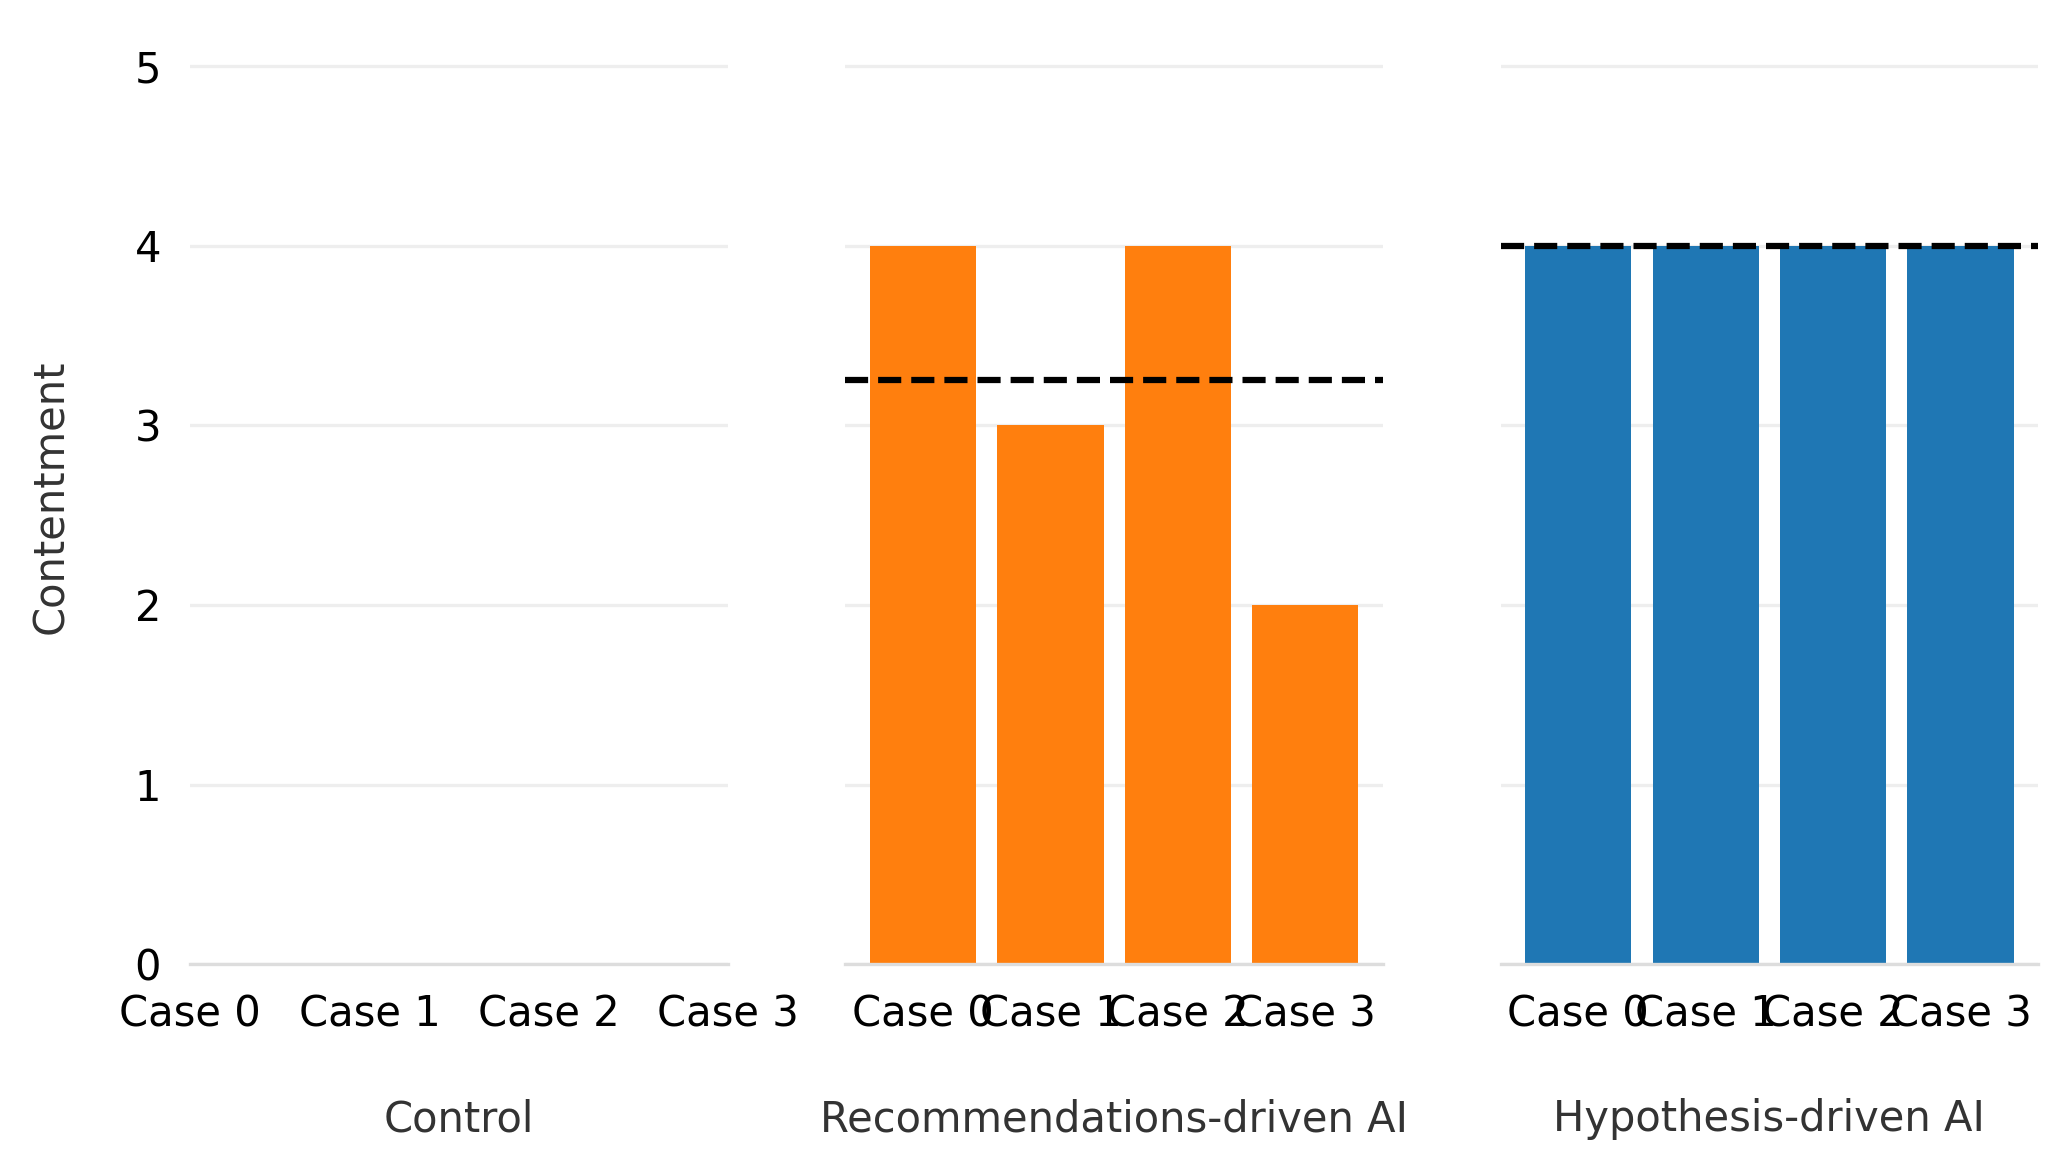

In [47]:
box_plot_measure_by_case(df, "contentment_level", ylim=[0,5.2], ylabel="Contentment")

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (3,) and arg 1 with shape (4,).

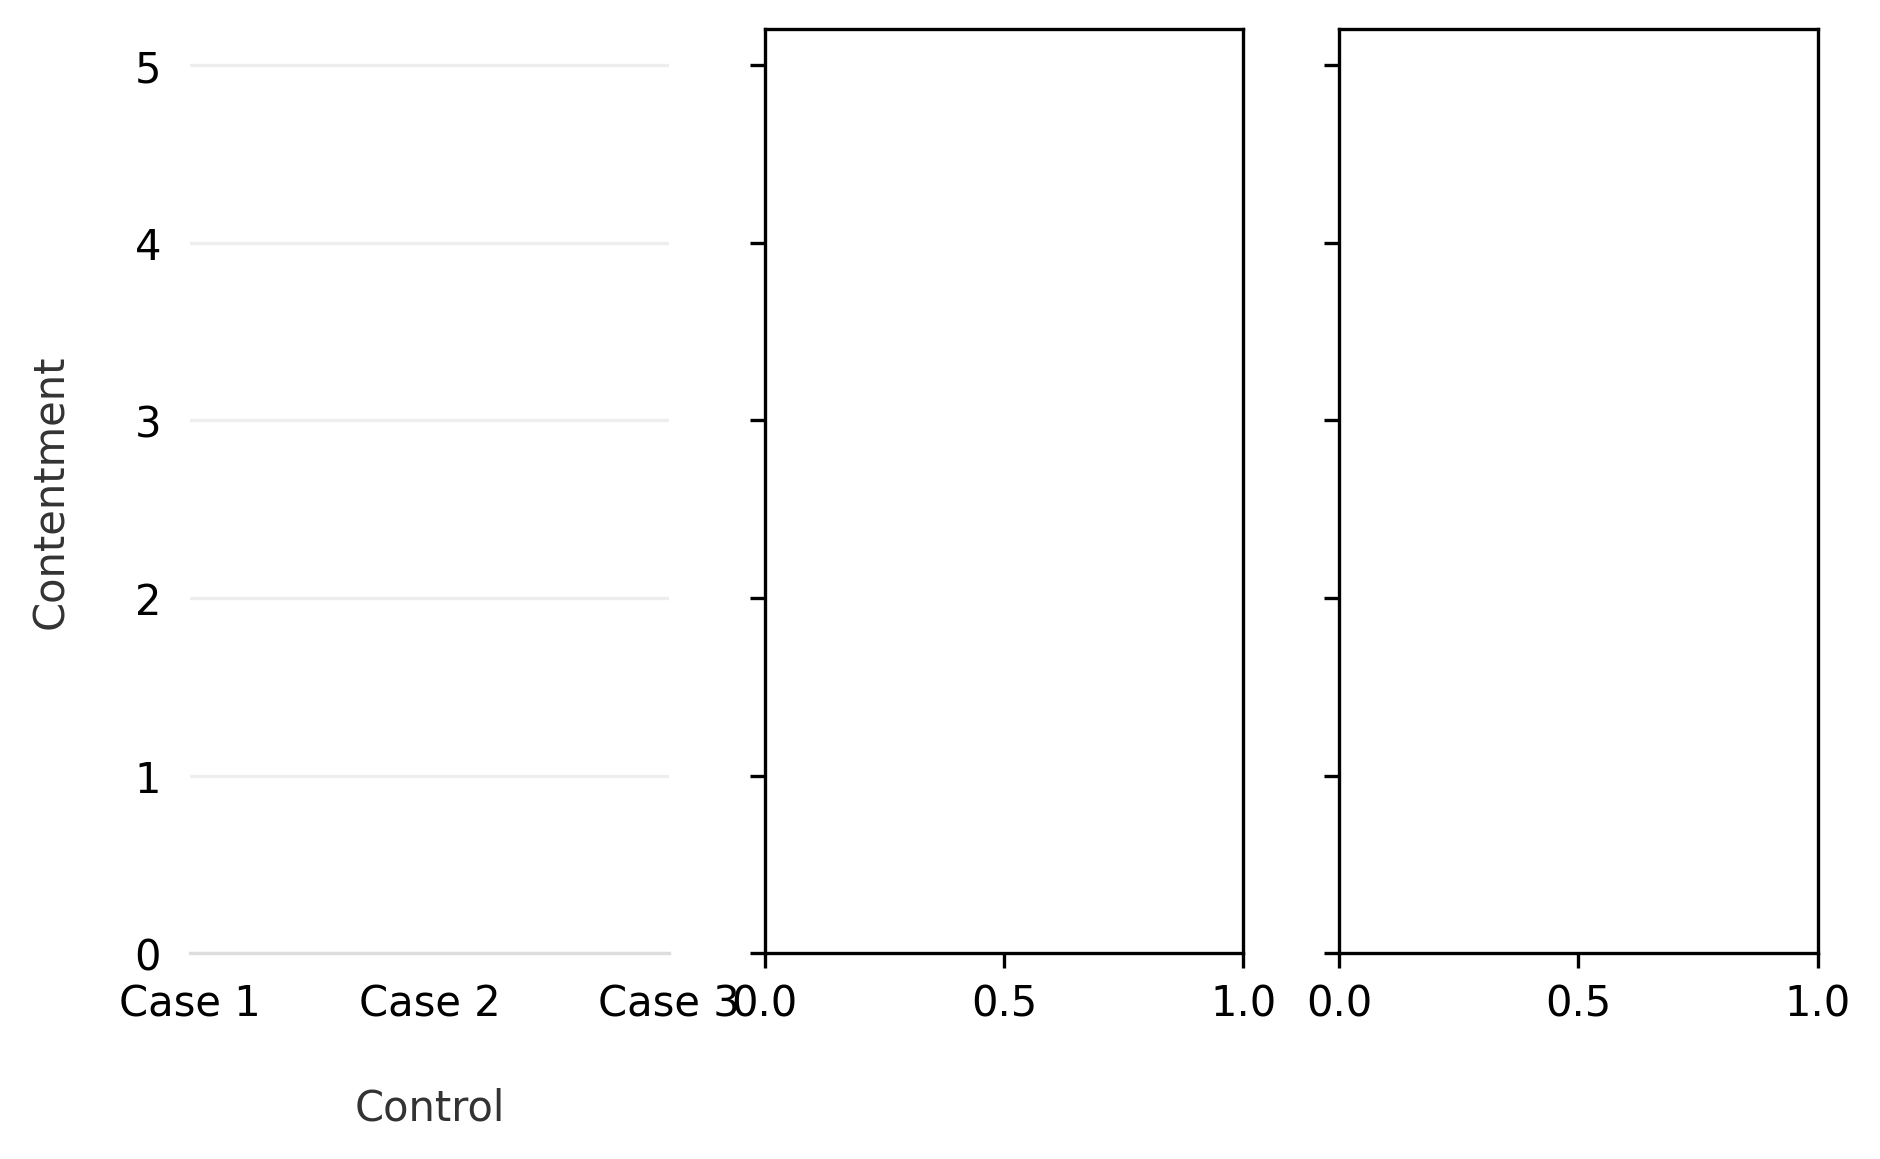

In [48]:
scatter_plot_measure_by_case(df, "contentment_level", ylim=[0,5.2], ylabel="Contentment")

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (6,) and arg 1 with shape (0,).

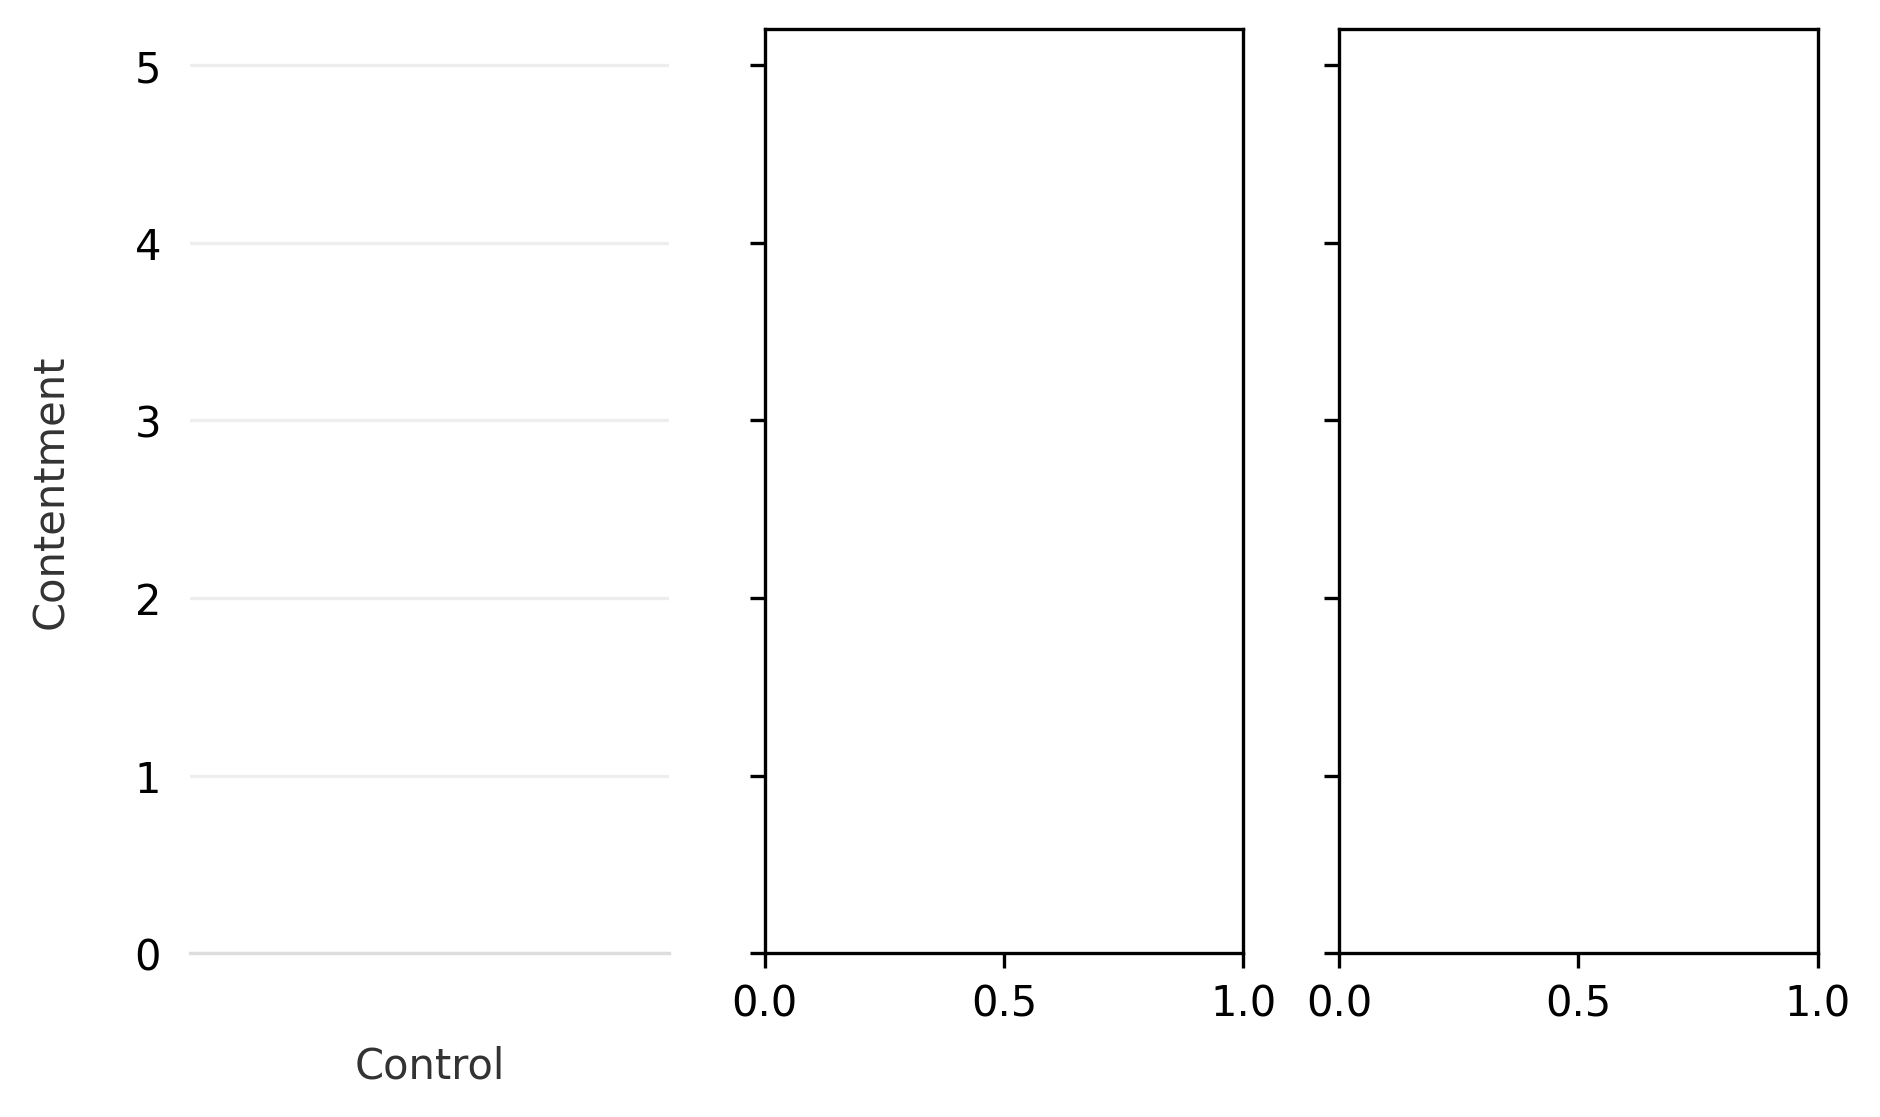

In [49]:
box_plot_measure_by_participant(df, "mean_contentment", ylabel="Contentment", ylim=[0, 5.2])

ValueError: x and y must be the same size

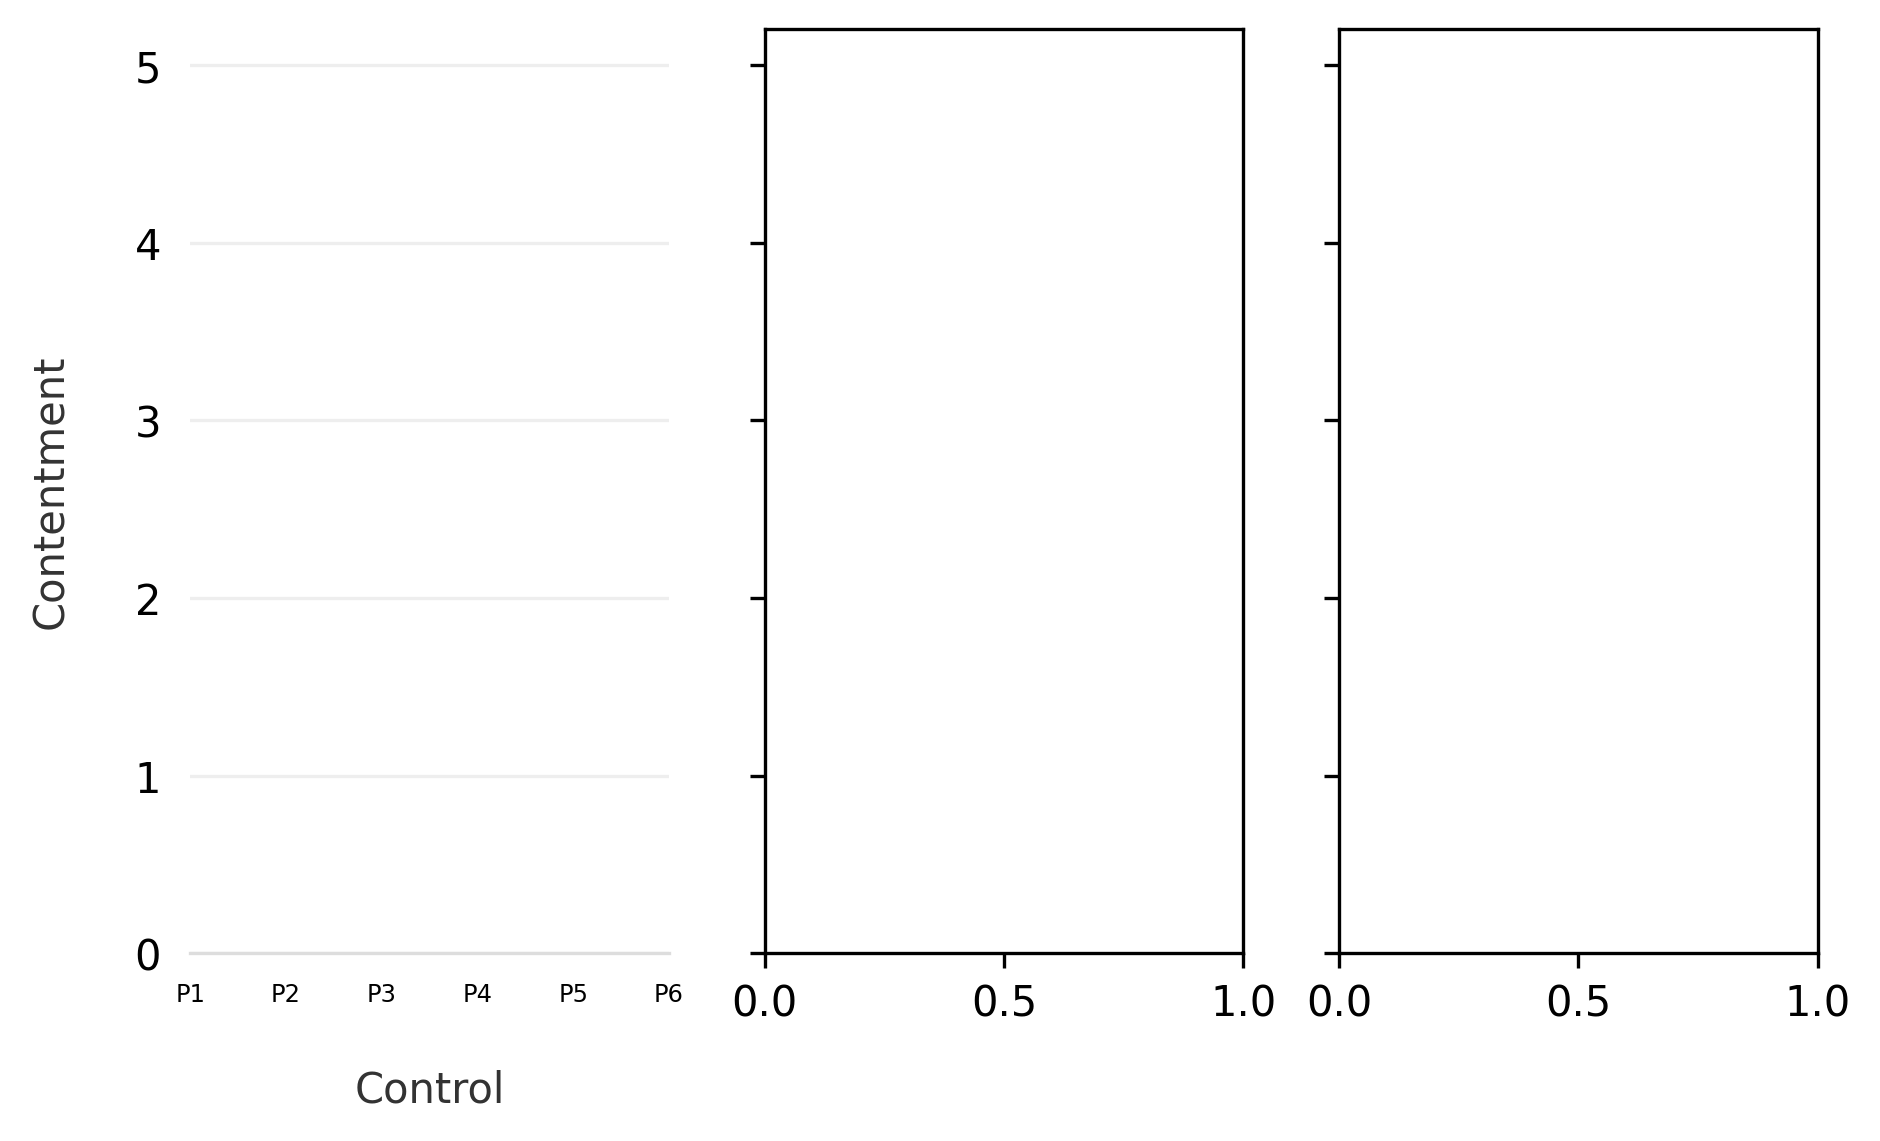

In [50]:
scatter_plot_measure_by_participant(df, "contentment_level", measure_mean="mean_contentment", ylabel="Contentment", ylim=[0, 5.2])

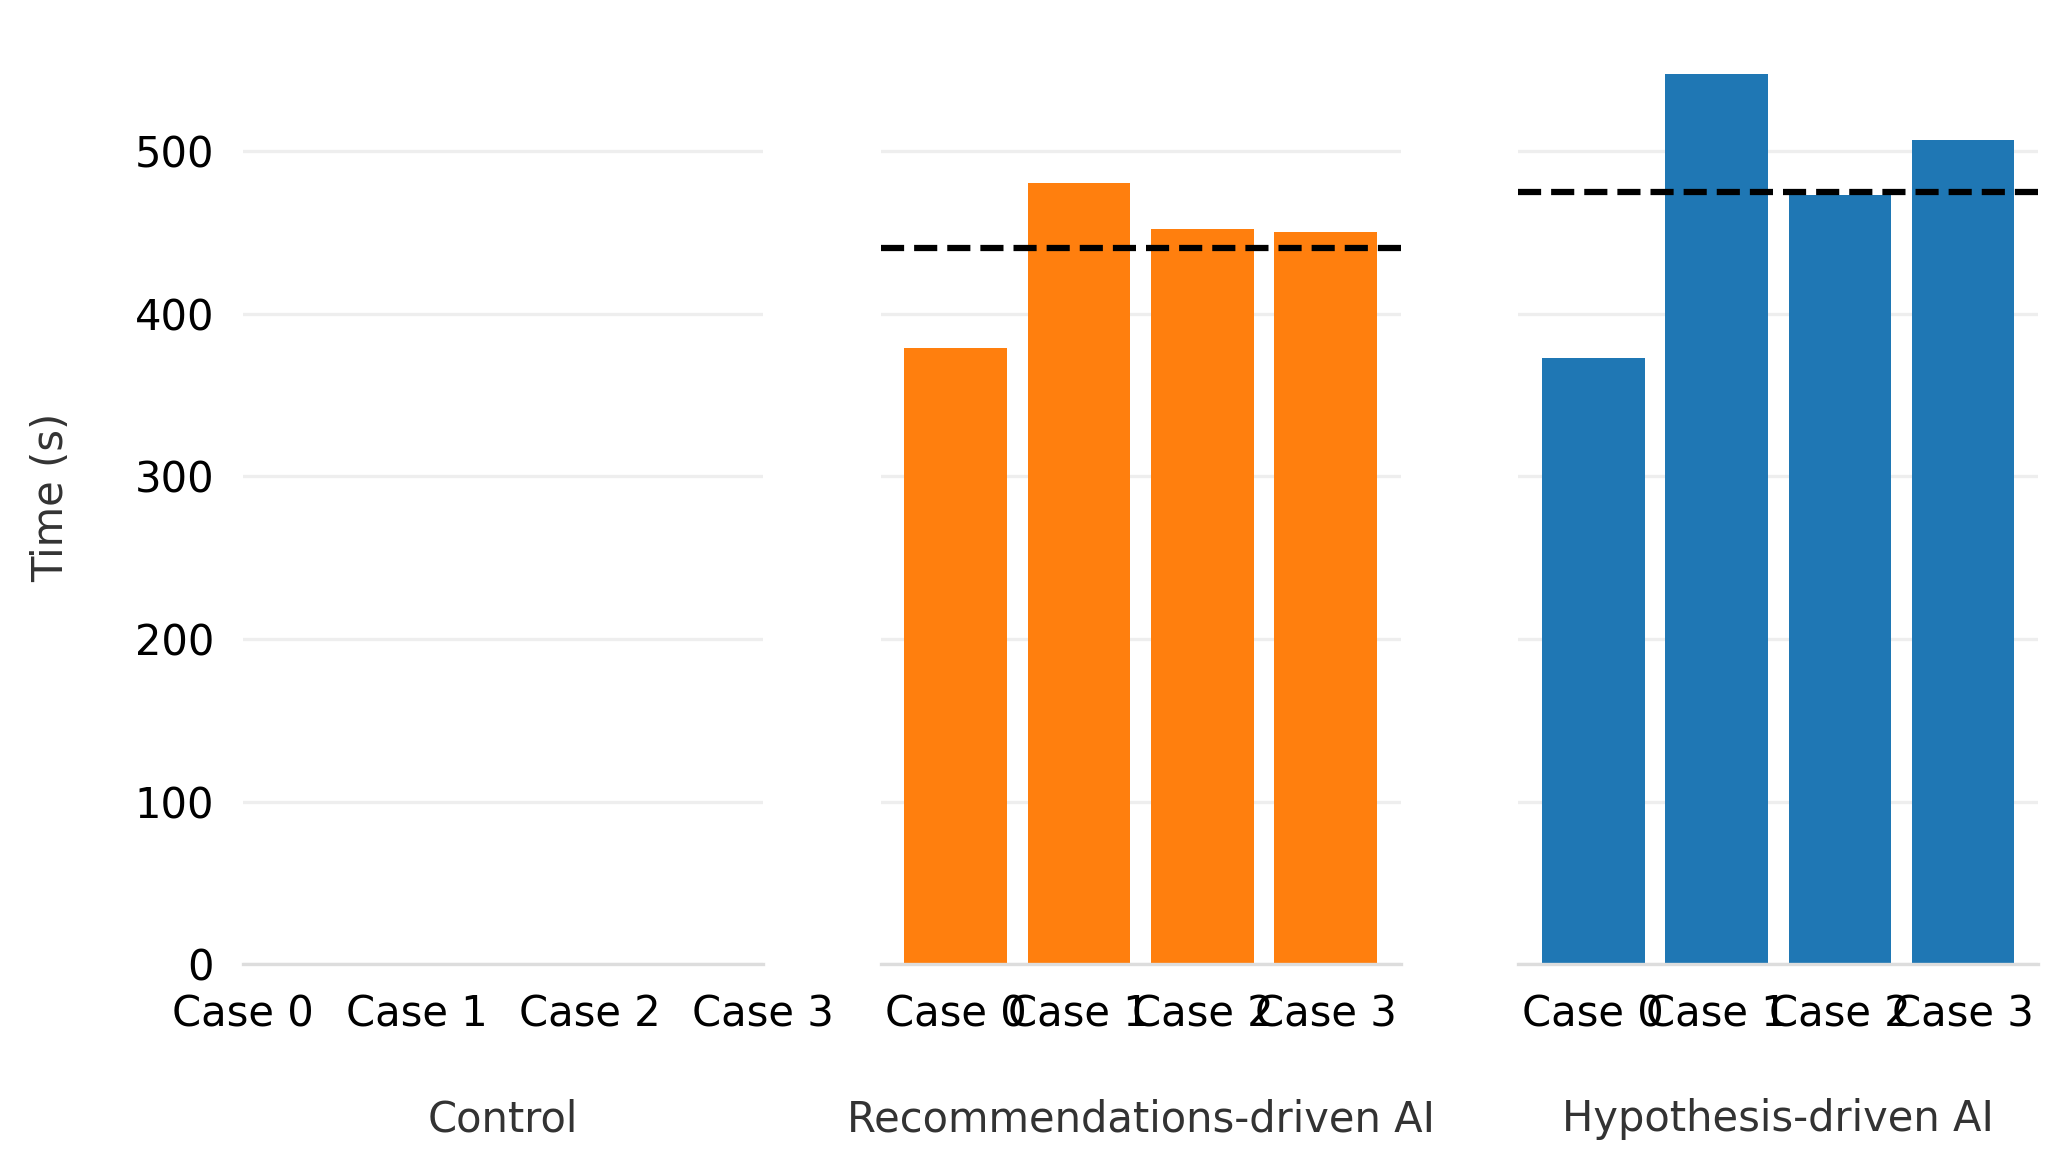

In [51]:
box_plot_measure_by_case(df, "time", ylabel="Time (s)")

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (3,) and arg 1 with shape (4,).

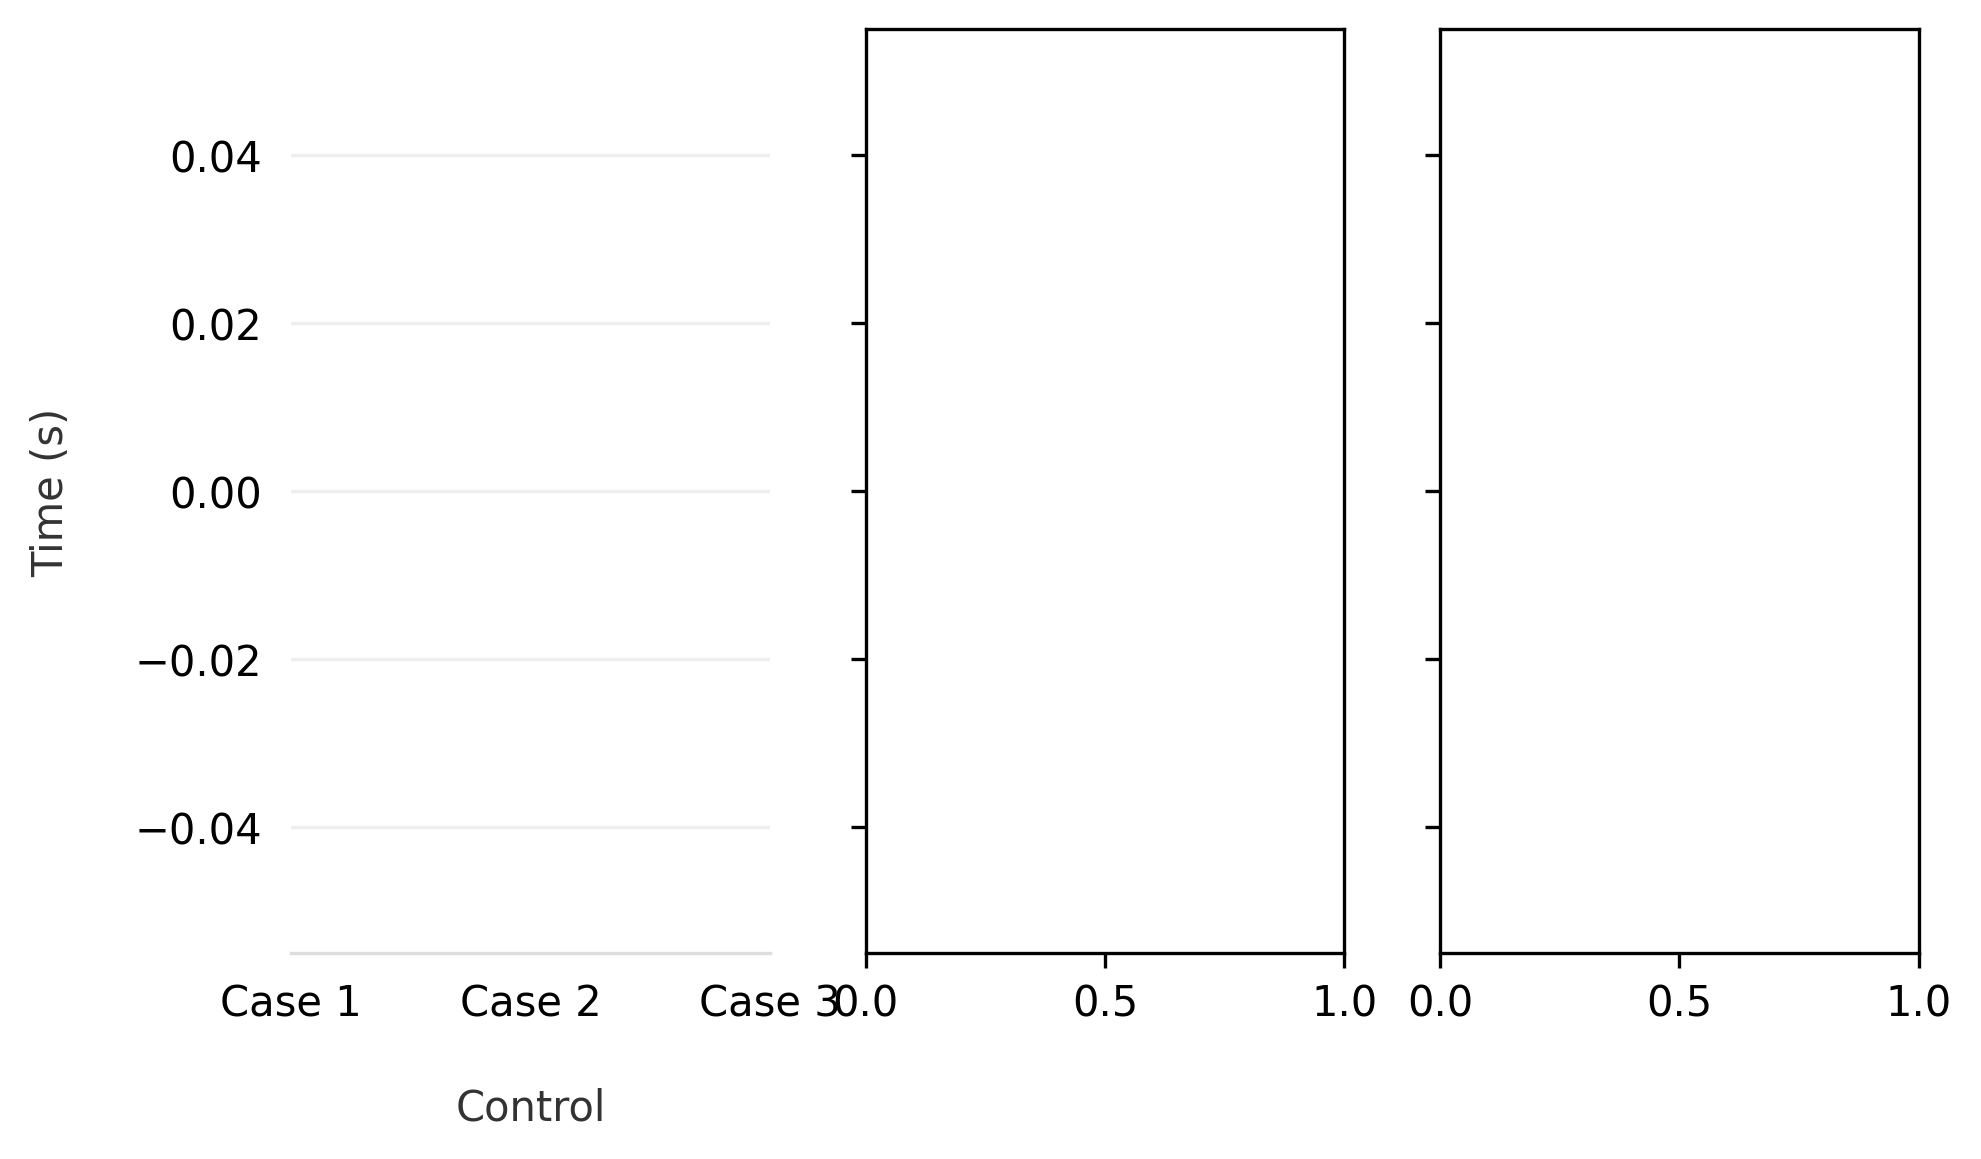

In [52]:
scatter_plot_measure_by_case(df, "time", ylabel="Time (s)")

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (6,) and arg 1 with shape (0,).

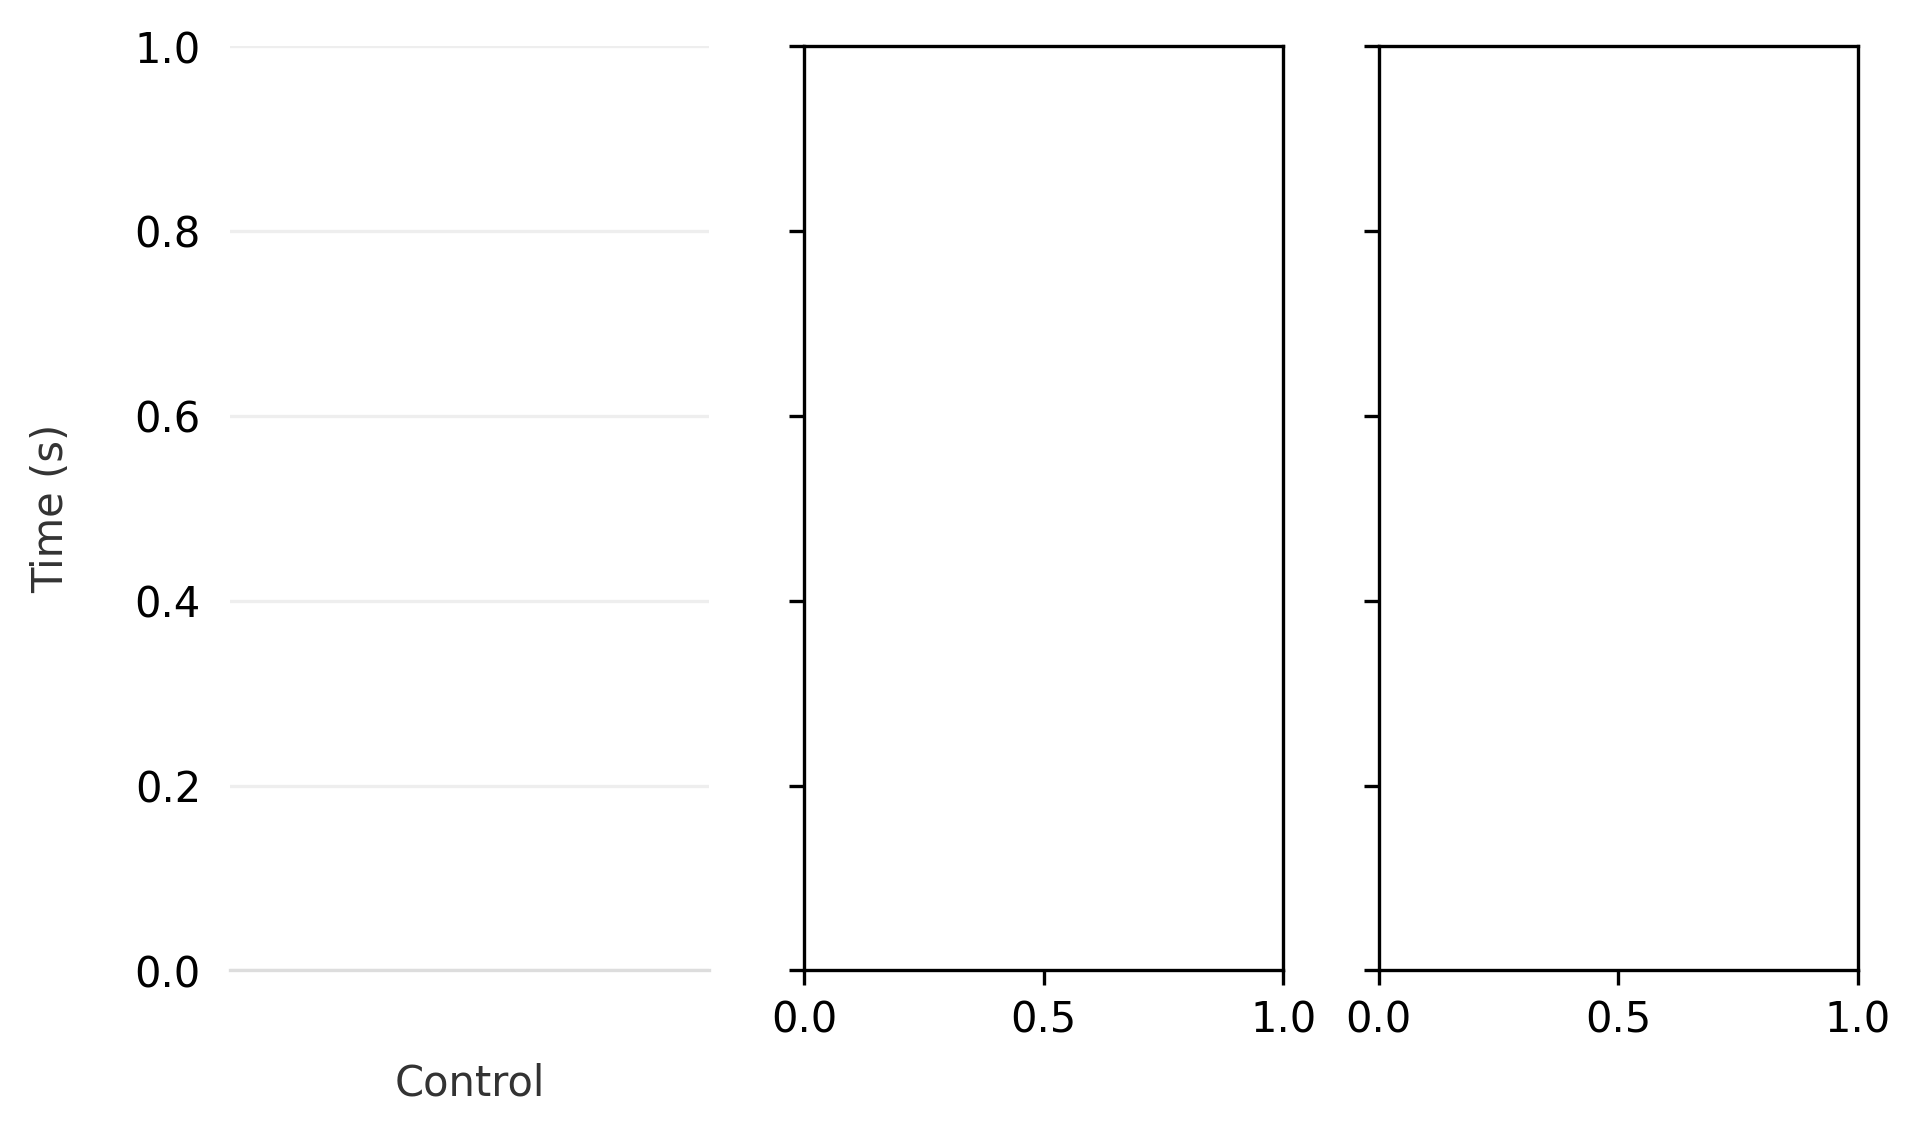

In [53]:
box_plot_measure_by_participant(df, "mean_time", ylabel="Time (s)")

ValueError: x and y must be the same size

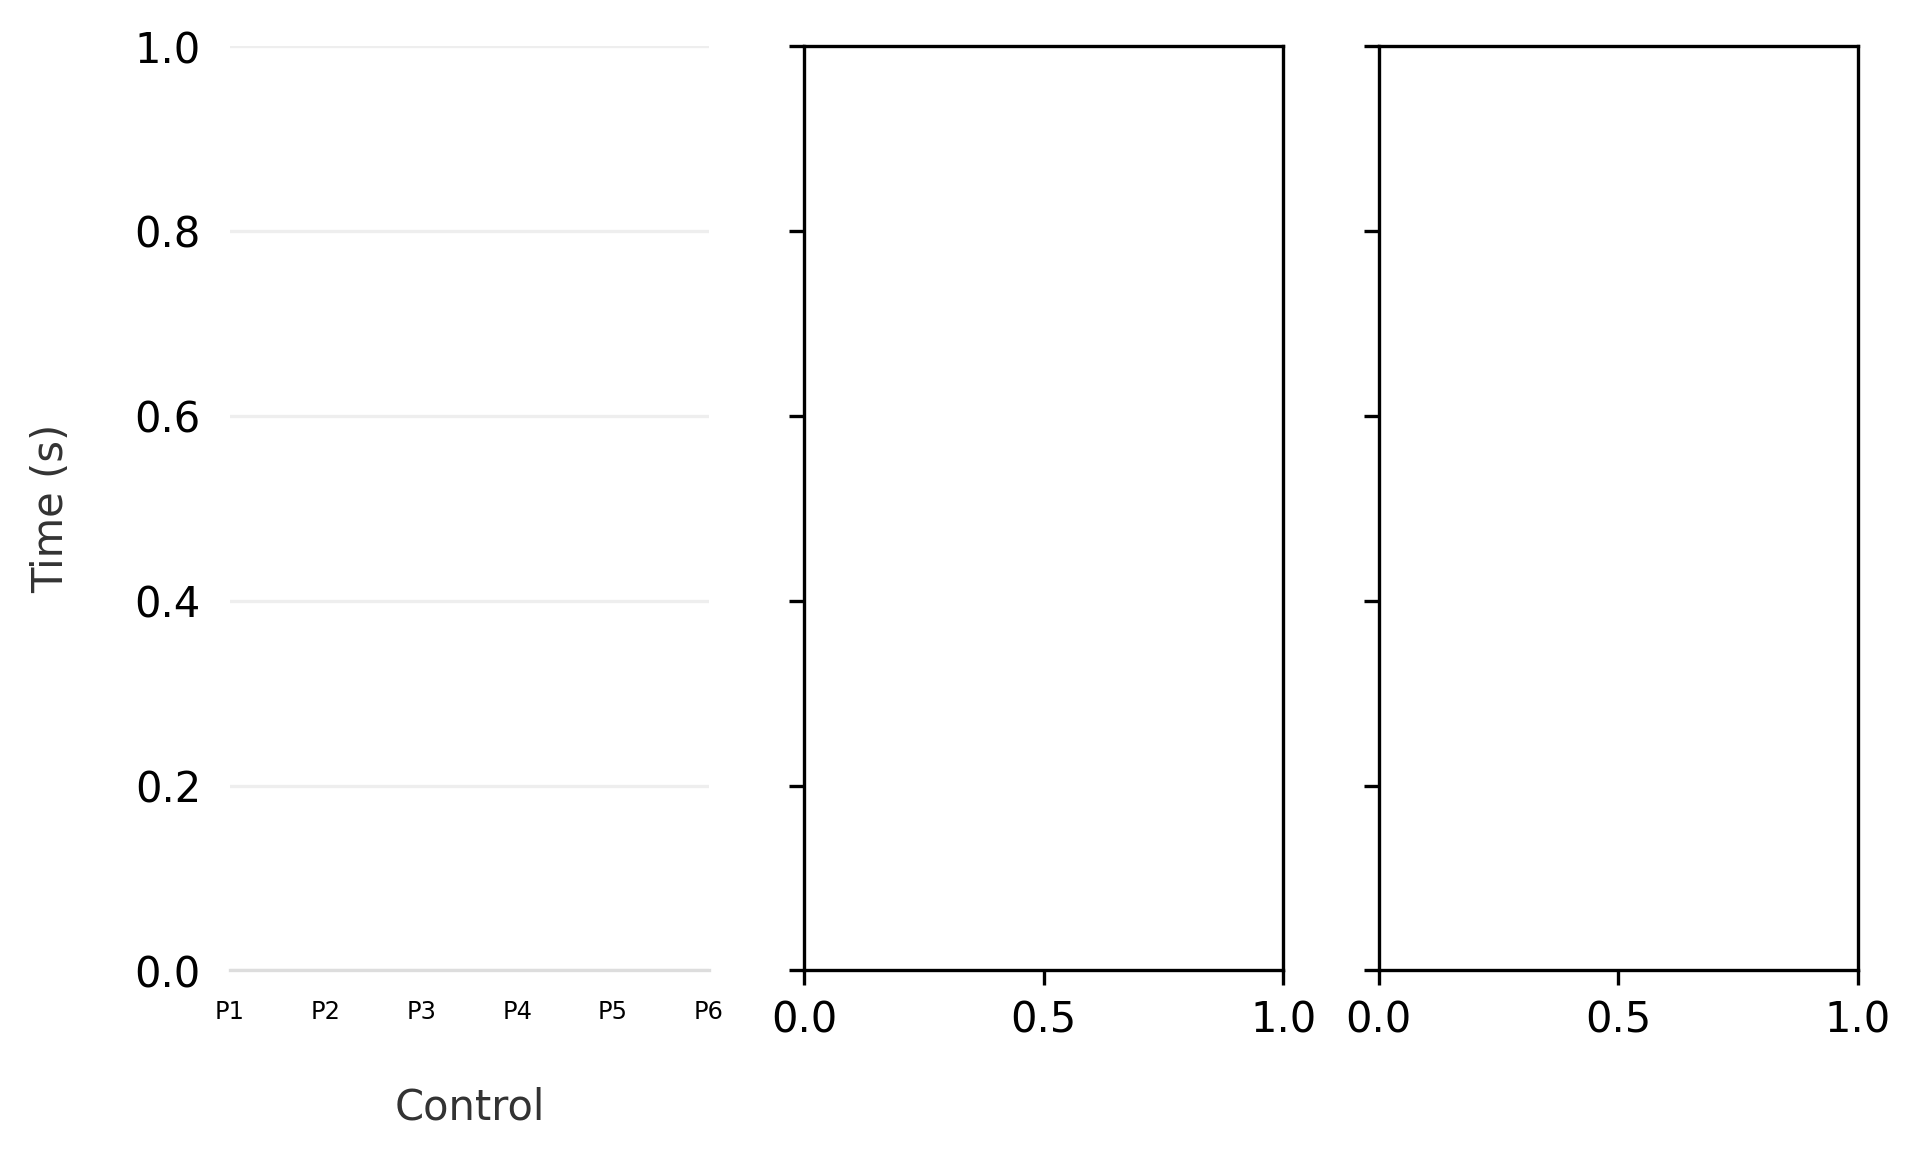

In [54]:
scatter_plot_measure_by_participant(df, "time", measure_mean="mean_time", ylabel="Time (s)")